In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sg, fftpack as fp, interpolate as ip
import pandas as pd
import csv
from pathlib import Path

In [2]:
FIGS_DIR = Path("plots")
FIGS_DIR.mkdir(exist_ok=True)

FILES_DIR = Path("files")
FILES_DIR.mkdir(exist_ok=True)

DATA_DIR = Path("data")
DATA_DIR.mkdir(exist_ok=True)

# Data records

In this notebook we analize data taken with an oscilloscope and data taken with the spectrum analizer in APC.

We use the board number 3 containing the v4.5 ASIC and the CMB board for comparison.

We took three sets of data:

1. Boards using the laboratory power supply
2. Boards using the laboratory power supply with the output filtered (custom-made filter at APC)
3. Boards using battery as power supply 

## Noise plots 

One important characteristic of the AwaXe devices is the noise behavior. In this section is presented the DAC noise measurements. The goal of this measurements is to find the values of the intrinsic output current noise source $i_n$ for the DACs (DAC TES and DAC SQUID).

The frequency range of interest is from 0.1\,Hz to 1000\,Hz. This range of frequencies is divided into three regions, the ultra-low frequency (ULF) region from 0.1\,Hz to 10\,Hz, one low-frequency (LF) region from 1\,Hz to 100\,Hz and a high-frequency (HF) region from 10\,Hz up to 1000\,Hz. This allows to have an overlap within the range of 10 to 100\,Hz to verify the homogeneity of the measurement. 

The experimental setup for the measurement of the noise characteristics of both devices was the same. A Keysight E3649A power supply was used to bias the boards (differential voltage $V_{cc}$ and $V_{ee}$). The output data was amplified by a Stanford Research SR650 low-noise amplifier, and for visualization and record, an Agilent 89410A  Vector Signal Analyzer was used. 

In order to understand how to analyze the data from the noise measurements, the noise path is presented in Figure 1 for the DAC.

<figure>
<img src="./images/DAC_meas_setup.png" style="width:60%">
<figcaption align = "center"> Figure 1. DAC measurement setup. </figcaption>
</figure>

For the noise measurement of the DAC, a load resistor $R_o = 510\,\Omega$ is used to convert it to voltage noise and a gain $G = 1000$ of the Stanford Research amplifier (see Figure 1) has to be considered, resulting in the following equation:

\begin{equation}
    n_{oDAC} = G \cdot R_o \cdot \sqrt{S_I} = 1000 \cdot 510 \cdot \sqrt{S_I} \Rightarrow \sqrt{S_I} = \frac{n_{oDAC}}{510000} \quad [{A}/\sqrt{Hz}]
    \label{eq:odac} \tag{1}
\end{equation}
The DAC output density noise is the combination of the intrinsic current noise $i_n$, the thermal noise due to the resistance $R_o$ and the noise added by the Stanford Research amplifier ($e_{nSR2} = 5\,$nV/$\sqrt{Hz}$\,@\,1\,kHz) resulting in the equation:
\begin{equation}
     \sqrt{S_I} = \sqrt{i_n^2 + \frac{4 \cdot k_B \cdot T}{510} + \left(\frac{e_{nSR2}}{510}\right)^2}
     \label{eq:sqrtSI} \tag{2}
\end{equation}
Using the previous equations, solving for $i_n$:
\begin{equation}
     i_n = \sqrt{\left(\frac{n_{oDAC}}{510000}\right)^2 - \frac{4 \cdot k_B \cdot T}{510} - \left(\frac{5 \times 10^{-9}}{510}\right)^2} \quad [{A}/\sqrt{Hz}]
     \label{eq:in} \tag{3}
\end{equation}

## Tesla vs Edison 

Goverment (CNES) gave them two the funding and AwaXe v4 (board 5). They have to measure the output noise of the DAC using different type of power source. 

#### 1.1. Plot tesla 

#### 1.2. Plot Edison

## AwaXe v4.5

### Read data (Board 3)  (Biased with power supply)

In [16]:
factor = 1e12/510000
color = ['black', 'orange', 'green', 'red', 'brown']
num = [1,3,4,5,6]

### TES_LF
TES1_LF = np.genfromtxt(DATA_DIR / 'v4.5_PS/345T1LPS.TXT') 
TES2_LF = np.genfromtxt(DATA_DIR / 'v4.5_PS/345T2LPS.TXT') 

### TES_HF
TES1_HF = np.genfromtxt(DATA_DIR / 'v4.5_PS/345T1HPS.TXT') 
TES2_HF = np.genfromtxt(DATA_DIR / 'v4.5_PS/345T2HPS.TXT')

### SQUID_LF
SQI1_LF = np.genfromtxt(DATA_DIR / 'v4.5_PS/345S1LPS.TXT') 
SQI2_LF = np.genfromtxt(DATA_DIR / 'v4.5_PS/345S2LPS.TXT')

### SQUID_HF
SQI1_HF = np.genfromtxt(DATA_DIR / 'v4.5_PS/345S1HPS.TXT') 
SQI2_HF = np.genfromtxt(DATA_DIR / 'v4.5_PS/345S2HPS.TXT')

### TES2_UF
TES2_UF = np.genfromtxt(DATA_DIR / 'v4.5_PS/345T2UPS.TXT') 

### SQID2_UF
SQI2_UF = np.genfromtxt(DATA_DIR / 'v4.5_PS/345S2UPS.TXT') 

### DATA to try compare 
SPECTRO_TES2 = np.genfromtxt(DATA_DIR / 'v4.5_PS/CMPT2HPS.TXT')
SPECTRO_SQI2 = np.genfromtxt(DATA_DIR / 'v4.5_PS/CMPS2HPS.TXT')

OSCILLO_TES2 = pd.read_csv(DATA_DIR / 'v4.5_PS/cmpt2hps.Wfm.csv', skiprows=0, header=None) # No header
OSCILLO_SQI2 = pd.read_csv(DATA_DIR / 'v4.5_PS/cmps2hps.Wfm.csv', skiprows=0, header=None) # No header

In [17]:
print(OSCILLO_TES2)

              0
0      0.004235
1      0.004479
2      0.003228
3      0.007397
4      0.002165
...         ...
79995  0.008140
79996  0.003604
79997  0.005731
79998  0.005148
79999  0.000462

[80000 rows x 1 columns]


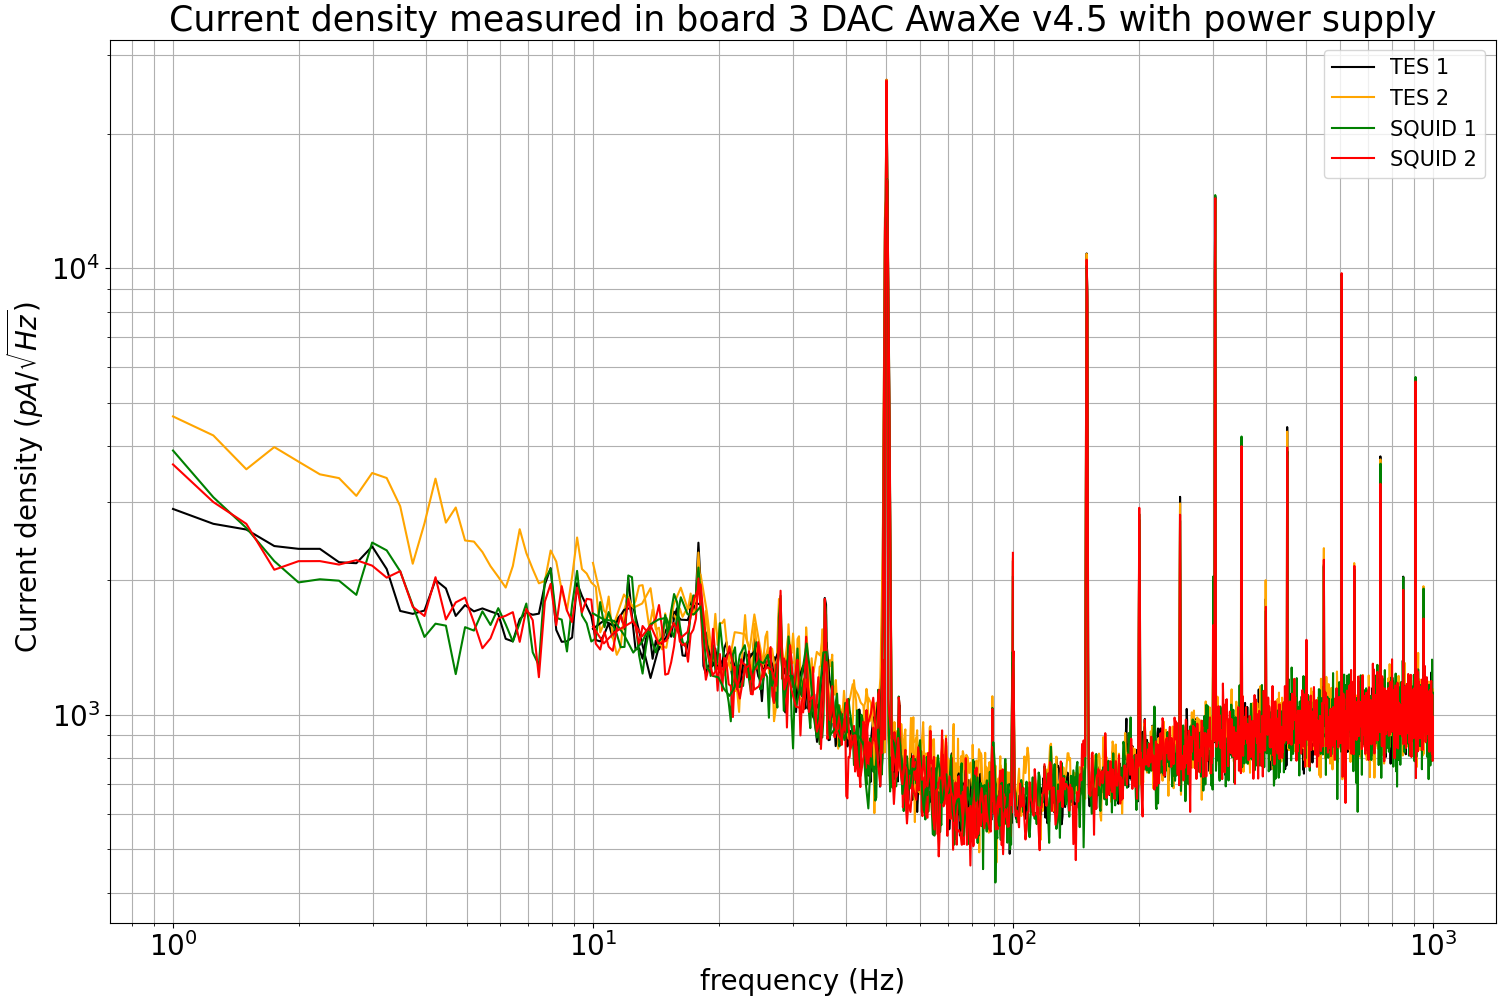

In [19]:
plt.figure(figsize = (15,10), constrained_layout=True)
# plt.subplot(211)

#TES_LF 
plt.loglog(TES1_LF[:,0], TES1_LF[:,1]*factor, color = color[0], label = 'TES 1' )
plt.loglog(TES2_LF[:,0], TES2_LF[:,1]*factor, color = color[1], label = 'TES 2' )
#TES_HF 
plt.loglog(TES1_HF[:,0], TES1_HF[:,1]*factor, color = color[0] )
plt.loglog(TES2_HF[:,0], TES2_HF[:,1]*factor, color = color[1] )
#SQUID_LF 
plt.loglog(SQI1_LF[:,0], SQI1_LF[:,1]*factor, color = color[2], label = 'SQUID 1' )
plt.loglog(SQI2_LF[:,0], SQI2_LF[:,1]*factor, color = color[3], label = 'SQUID 2' )
#SQUID_HF 
plt.loglog(SQI1_HF[:,0], SQI1_HF[:,1]*factor, color = color[2] )
plt.loglog(SQI2_HF[:,0], SQI2_HF[:,1]*factor, color = color[3] )


plt.gca().set_title('Current density measured in board 3 DAC AwaXe v4.5 with power supply',fontsize = 25)
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.savefig(FIGS_DIR / 'board3_v4.5_TES12_SQUID12.png')

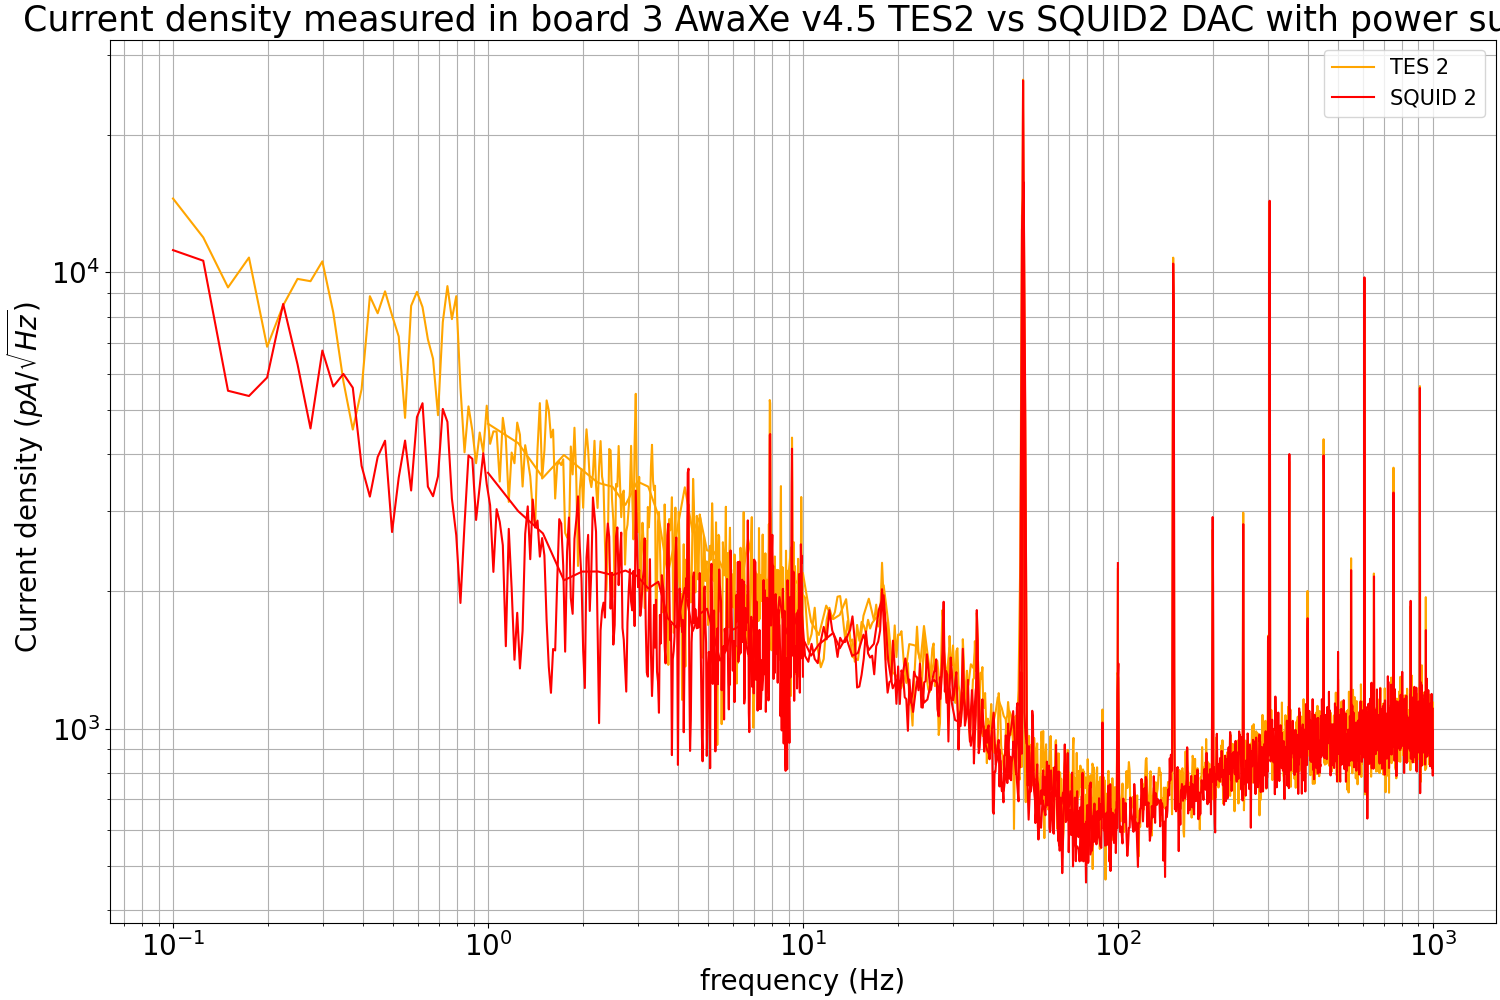

In [21]:
plt.figure(figsize = (15,10), constrained_layout=True)
# plt.subplot(211)
#TES_UF 
plt.loglog(TES2_UF[:,0], TES2_UF[:,1]*factor, color = color[1])
#TES_LF 
plt.loglog(TES2_LF[:,0], TES2_LF[:,1]*factor, color = color[1], label = 'TES 2' )
#TES_HF 
plt.loglog(TES2_HF[:,0], TES2_HF[:,1]*factor, color = color[1] )
#SQID_UF 
plt.loglog(SQI2_UF[:,0], SQI2_UF[:,1]*factor, color = color[3] )
#SQUID_LF 
plt.loglog(SQI2_LF[:,0], SQI2_LF[:,1]*factor, color = color[3], label = 'SQUID 2' )
#SQUID_HF 
plt.loglog(SQI2_HF[:,0], SQI2_HF[:,1]*factor, color = color[3] )


plt.gca().set_title('Current density measured in board 3 AwaXe v4.5 TES2 vs SQUID2 DAC with power supply',fontsize = 25)
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.savefig(FIGS_DIR / 'board3_v4.5_TES2_SQUID2_ultralownoise.png')

In [22]:
def compute_power_spectral_density(signal, sample_rate, nperseg, bandwidth):
    from scipy.signal import welch
    from scipy.signal.windows import hann
    """
    Computes the Power Spectral Density (PSD) of a given signal using Welch's method,
    considering the bandwidth of the oscilloscope.

    Parameters:
    signal (numpy array): The input signal.
    sample_rate (float): The sampling rate of the signal (in Hz).
    nperseg (int, optional): Length of each segment for Welch's method (default is 256).
    bandwidth (float): Bandwidth of the oscilloscope (in Hz).

    Returns:
    freq (numpy array): Frequencies at which the PSD is computed.
    psd (numpy array): Power Spectral Density at each frequency.
    """

    # Apply a Hanning window to the signal
    window = hann(nperseg)
    signal = signal * window

    # Compute the Power Spectral Density using Welch's method
    freq, psd = welch(signal, sample_rate, nperseg=nperseg)

    # Consider the oscilloscope's bandwidth
    valid_indices = freq <= bandwidth / 2  # Keep only frequencies within bandwidth
    freq = freq[valid_indices]
    psd = psd[valid_indices]

    return freq, psd

In [39]:
# from scipy.signal import welch 
# from scipy.signal.windows import hann 
# ?welch

In [23]:
sample_rate = 20000
ft1,val1 = compute_power_spectral_density(OSCILLO_TES2[0]*factor, sample_rate, 80000, 20e6)
ft2,val2 = compute_power_spectral_density(OSCILLO_SQI2[0]*factor, sample_rate, 80000, 20e6)

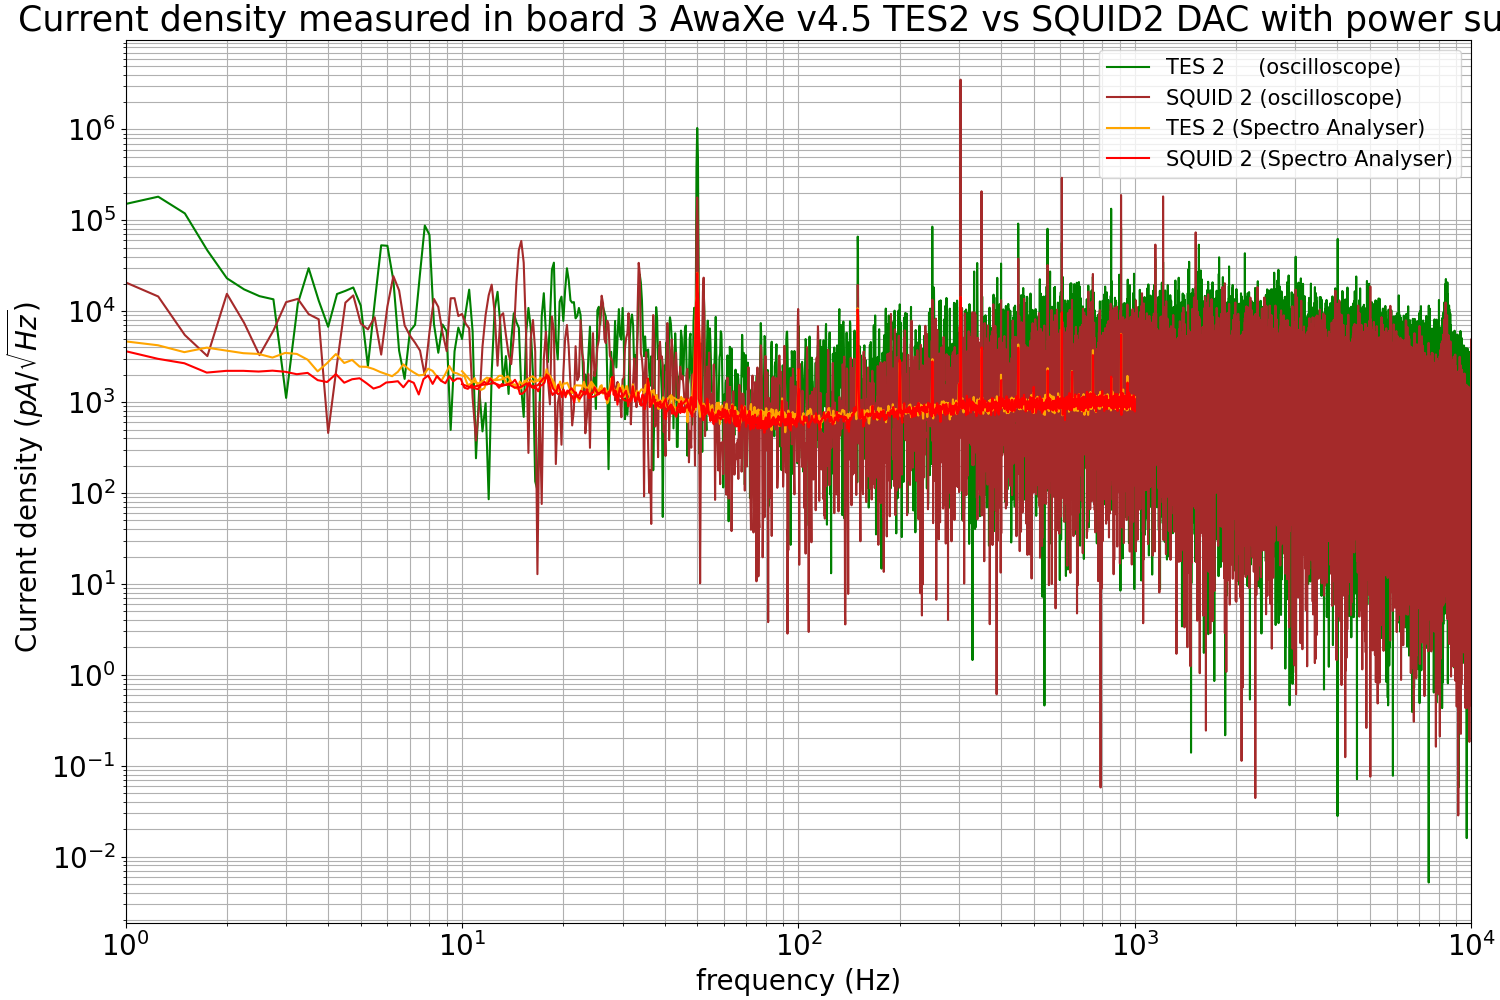

In [25]:
plt.figure(figsize = (15,10), constrained_layout=True)
# plt.subplot(211)

# #TES_LF 
# plt.loglog(TES2_LF[:,0], TES2_LF[:,1]*factor, color = color[1], label = 'TES 2' )
# #TES_HF 
# plt.loglog(TES2_HF[:,0], TES2_HF[:,1]*factor, color = color[1] )

# #SQUID_LF 
# plt.loglog(SQI2_LF[:,0], SQI2_LF[:,1]*factor, color = color[3], label = 'SQUID 2' )
# #SQUID_HF 
# plt.loglog(SQI2_HF[:,0], SQI2_HF[:,1]*factor, color = color[3] )

#Oscilloscope 
plt.loglog(ft1,val1, color = color[2], label = 'TES 2     (oscilloscope)')
plt.loglog(ft2,val2, color = color[4], label = 'SQUID 2 (oscilloscope)')

#TES_LF 
plt.loglog(TES2_LF[:,0], TES2_LF[:,1]*factor, color = color[1], label = 'TES 2 (Spectro Analyser)' )
#TES_HF 
plt.loglog(TES2_HF[:,0], TES2_HF[:,1]*factor, color = color[1] )

#SQUID_LF 
plt.loglog(SQI2_LF[:,0], SQI2_LF[:,1]*factor, color = color[3], label = 'SQUID 2 (Spectro Analyser)' )
#SQUID_HF 
plt.loglog(SQI2_HF[:,0], SQI2_HF[:,1]*factor, color = color[3] )


plt.gca().set_title('Current density measured in board 3 AwaXe v4.5 TES2 vs SQUID2 DAC with power supply',fontsize = 25)
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.xlim(1,1e4)
plt.savefig(FIGS_DIR / 'spectrum_compare.png')

### Read data (board 3) (Biased with batteries)

In [26]:
### TES_LF
TES1BA_LF = np.genfromtxt(DATA_DIR / 'v4.5_20122024/345T1LBA.TXT') 
TES2BA_LF = np.genfromtxt(DATA_DIR / 'v4.5_20122024/345T2LBA.TXT') 
TES1BA_HF = np.genfromtxt(DATA_DIR / 'v4.5_20122024/345T1HBA.TXT') 
TES2BA_HF = np.genfromtxt(DATA_DIR / 'v4.5_20122024/345T2HBA.TXT')
SQI1BA_LF = np.genfromtxt(DATA_DIR / 'v4.5_20122024/345S1LBA.TXT') 
SQI2BA_LF = np.genfromtxt(DATA_DIR / 'v4.5_20122024/345S2LBA.TXT')
SQI1BA_HF = np.genfromtxt(DATA_DIR / 'v4.5_20122024/345S1HBA.TXT') 
SQI2BA_HF = np.genfromtxt(DATA_DIR / 'v4.5_20122024/345S2HBA.TXT')
TES2BA_UF = np.genfromtxt(DATA_DIR / 'v4.5_20122024/345T2UBA.TXT')
TES2BA_UF = np.genfromtxt(DATA_DIR / 'v4.5_20122024/345T2UBA.TXT') 
SQI2BA_UF = np.genfromtxt(DATA_DIR / 'v4.5_20122024/345S2UBA.TXT') 
TES1BA_UF = np.genfromtxt(DATA_DIR / 'v4.5_20122024/345T1UBA.TXT') 
SQI1BA_UF = np.genfromtxt(DATA_DIR / 'v4.5_20122024/345S1UBA.TXT') 
# ### DATA to try compare 
# SPECTRO_TES2 = np.genfromtxt('v4.5/CMPT2HPS.TXT')
# SPECTRO_SQI2 = np.genfromtxt('v4.5/CMPS2HPS.TXT')

# OSCILLO_TES2 = pd.read_csv('v4.5/cmpt2hps.Wfm.csv', skiprows=0, header=None) # No header
# OSCILLO_SQI2 = pd.read_csv('v4.5/cmps2hps.Wfm.csv', skiprows=0, header=None) # No header

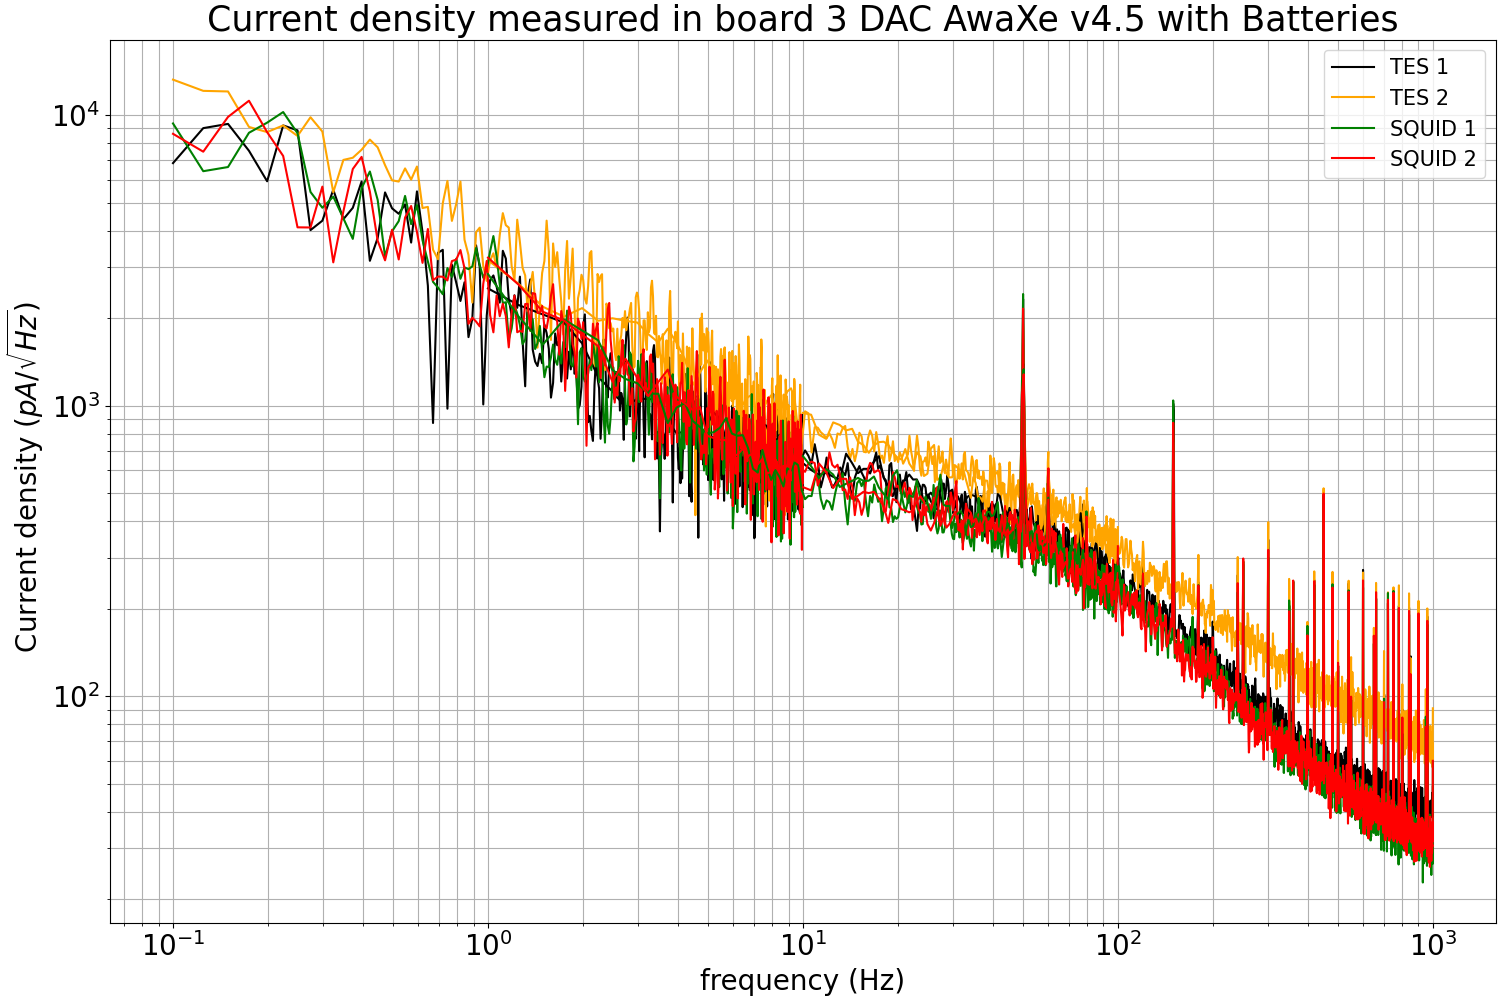

In [27]:
plt.figure(figsize = (15,10), constrained_layout=True)
# plt.subplot(211)

#TES_LF 
plt.loglog(TES1BA_UF[:,0], TES1BA_UF[:,1]*factor, color = color[0] )
plt.loglog(TES2BA_UF[:,0], TES2BA_UF[:,1]*factor, color = color[1] )
plt.loglog(TES1BA_LF[:,0], TES1BA_LF[:,1]*factor, color = color[0], label = 'TES 1' )
plt.loglog(TES2BA_LF[:,0], TES2BA_LF[:,1]*factor, color = color[1], label = 'TES 2' )
plt.loglog(TES1BA_HF[:,0], TES1BA_HF[:,1]*factor, color = color[0] )
plt.loglog(TES2BA_HF[:,0], TES2BA_HF[:,1]*factor, color = color[1] )

plt.loglog(SQI1BA_UF[:,0], SQI1BA_UF[:,1]*factor, color = color[2] )
plt.loglog(SQI2BA_UF[:,0], SQI2BA_UF[:,1]*factor, color = color[3] )
plt.loglog(SQI1BA_LF[:,0], SQI1BA_LF[:,1]*factor, color = color[2], label = 'SQUID 1' )
plt.loglog(SQI2BA_LF[:,0], SQI2BA_LF[:,1]*factor, color = color[3], label = 'SQUID 2' )
plt.loglog(SQI1BA_HF[:,0], SQI1BA_HF[:,1]*factor, color = color[2] )
plt.loglog(SQI2BA_HF[:,0], SQI2BA_HF[:,1]*factor, color = color[3] )



plt.gca().set_title('Current density measured in board 3 DAC AwaXe v4.5 with Batteries',fontsize = 25)
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")

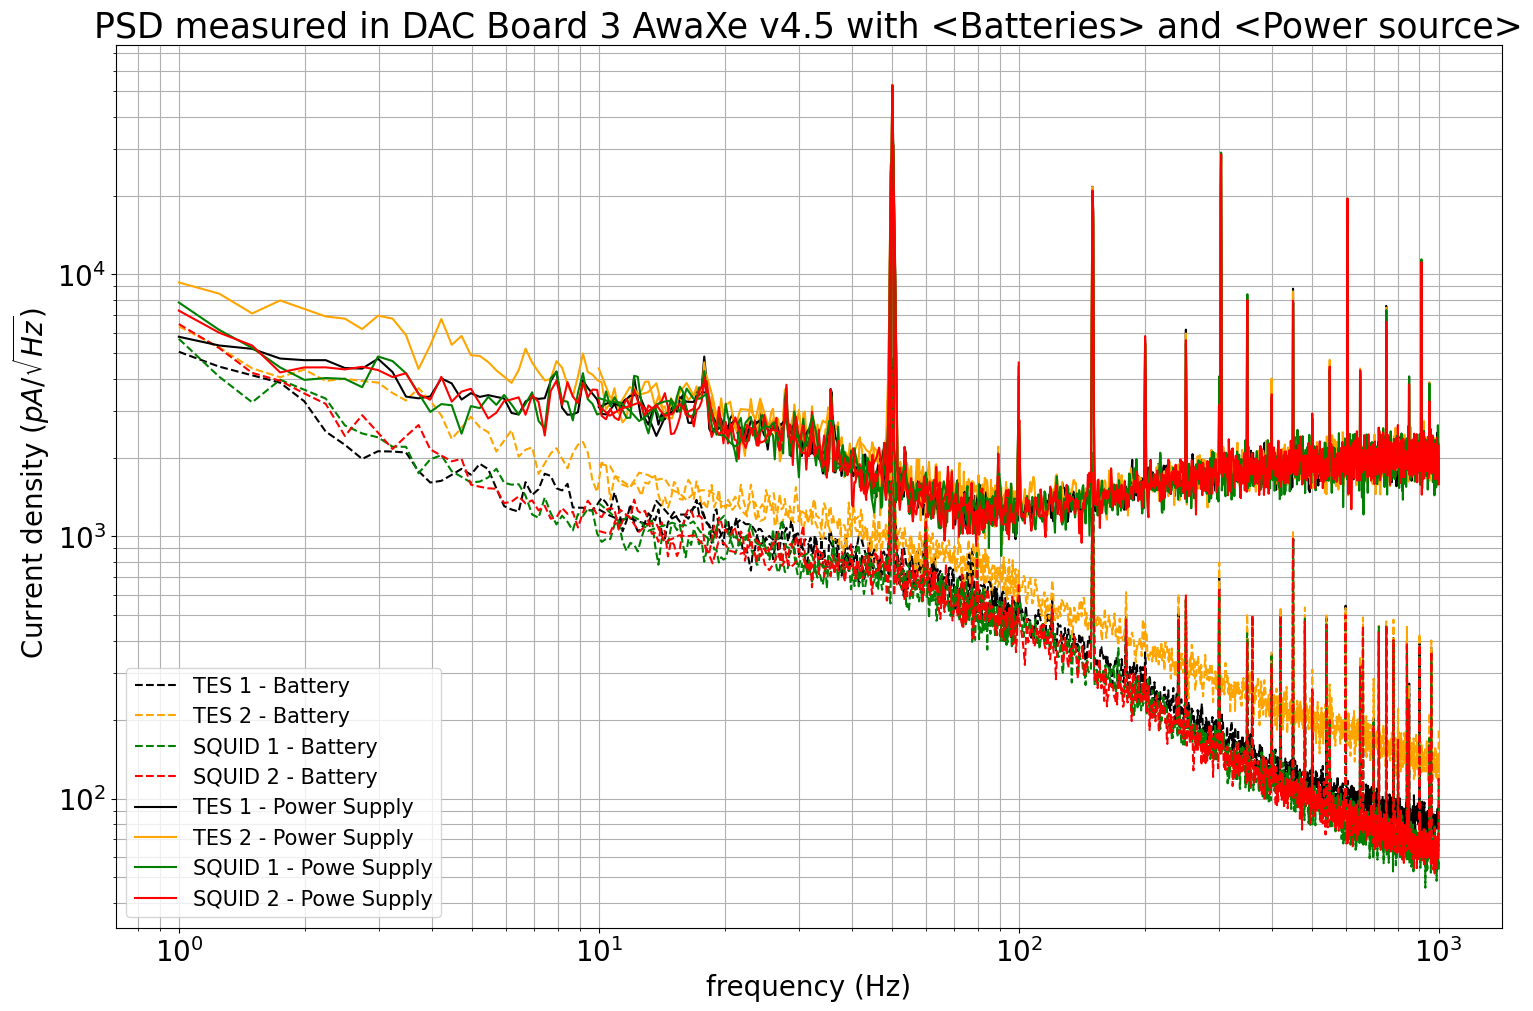

In [102]:
plt.figure(figsize = (15,10), constrained_layout=True)
# plt.subplot(211)

#TES_LF 
plt.loglog(TES1BA_LF[:,0], TES1BA_LF[:,1]*factor,linestyle = 'dashed', color = color[0], label = 'TES 1 - Battery' )
plt.loglog(TES2BA_LF[:,0], TES2BA_LF[:,1]*factor,linestyle = 'dashed', color = color[1], label = 'TES 2 - Battery' )
plt.loglog(TES1BA_HF[:,0], TES1BA_HF[:,1]*factor,linestyle = 'dashed', color = color[0] )
plt.loglog(TES2BA_HF[:,0], TES2BA_HF[:,1]*factor,linestyle = 'dashed', color = color[1] )
plt.loglog(SQI1BA_LF[:,0], SQI1BA_LF[:,1]*factor,linestyle = 'dashed', color = color[2], label = 'SQUID 1 - Battery' )
plt.loglog(SQI2BA_LF[:,0], SQI2BA_LF[:,1]*factor,linestyle = 'dashed', color = color[3], label = 'SQUID 2 - Battery' )
plt.loglog(SQI1BA_HF[:,0], SQI1BA_HF[:,1]*factor,linestyle = 'dashed', color = color[2] )
plt.loglog(SQI2BA_HF[:,0], SQI2BA_HF[:,1]*factor,linestyle = 'dashed', color = color[3] )

#------

#TES_LF 
plt.loglog(TES1_LF[:,0], TES1_LF[:,1]*factor, color = color[0], label = 'TES 1 - Power Supply' )
plt.loglog(TES2_LF[:,0], TES2_LF[:,1]*factor, color = color[1], label = 'TES 2 - Power Supply' )
#TES_HF 
plt.loglog(TES1_HF[:,0], TES1_HF[:,1]*factor, color = color[0] )
plt.loglog(TES2_HF[:,0], TES2_HF[:,1]*factor, color = color[1] )
#SQUID_LF 
plt.loglog(SQI1_LF[:,0], SQI1_LF[:,1]*factor, color = color[2], label = 'SQUID 1 - Powe Supply' )
plt.loglog(SQI2_LF[:,0], SQI2_LF[:,1]*factor, color = color[3], label = 'SQUID 2 - Powe Supply' )
#SQUID_HF 
plt.loglog(SQI1_HF[:,0], SQI1_HF[:,1]*factor, color = color[2] )
plt.loglog(SQI2_HF[:,0], SQI2_HF[:,1]*factor, color = color[3] )

plt.gca().set_title('PSD measured in DAC Board 3 AwaXe v4.5 with <Batteries> and <Power source>',fontsize = 25)
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")

In [28]:
### Oscilloscope 

OSCILLO_TES2BA = pd.read_csv(DATA_DIR / 'v4.5_20122024/345t2ba.Wfm.csv', skiprows=0, header=None) # No header
OSCILLO_SQI2BA = pd.read_csv(DATA_DIR / 'v4.5_20122024/345s2ba.Wfm.csv', skiprows=0, header=None) # No header
OSCILLO_TES1BA = pd.read_csv(DATA_DIR / 'v4.5_20122024/345t1ba.Wfm.csv', skiprows=0, header=None) # No header
OSCILLO_SQI1BA = pd.read_csv(DATA_DIR / 'v4.5_20122024/345s1ba.Wfm.csv', skiprows=0, header=None) # No header

In [29]:
OSCILLO_analyse = [OSCILLO_TES2BA,
OSCILLO_SQI2BA,
OSCILLO_TES1BA,
OSCILLO_SQI1BA]

In [30]:
len(OSCILLO_TES2BA)

400000

In [31]:
def PSD_avg(data, Fs, BW, nperseg):  # Added nperseg argument
    """
    Computes the average Power Spectral Density (PSD) of a given signal 
    over multiple segments.

    Parameters:
    data (numpy array): The input signal.
    Fs (float): The sampling rate of the signal (in Hz).
    BW (float): Bandwidth of the oscilloscope (in Hz).
    nperseg (int, optional): Length of each segment for Welch's method (default is 256).

    Returns:
    freq (numpy array): Frequencies at which the PSD is computed.
    avg_psd (numpy array): Average Power Spectral Density at each frequency.
    """
    L = len(data)
    n = int(L / Fs) 
    # print(n)
    psd_sum = np.zeros(L // n // 2 +1)  # Initialize array to store PSD sum
    print(np.size(psd_sum))
    count = 0
    for i in range(n):
        # print(i)
        fre, val = compute_power_spectral_density(data[count:count + Fs], Fs, nperseg, BW)
        psd_sum += val 
        count += Fs

    avg_psd = psd_sum / n
    return fre, avg_psd  # Return the frequency array from the last segment

In [32]:
Fs = 20000
BW = 20e6
# f,va = PSD_avg(OSCILLO_TES2BA[0], Fs, BW, 20000)

10001
10001
10001
10001


/tmp/ipykernel_137819/1473736466.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize = 15)


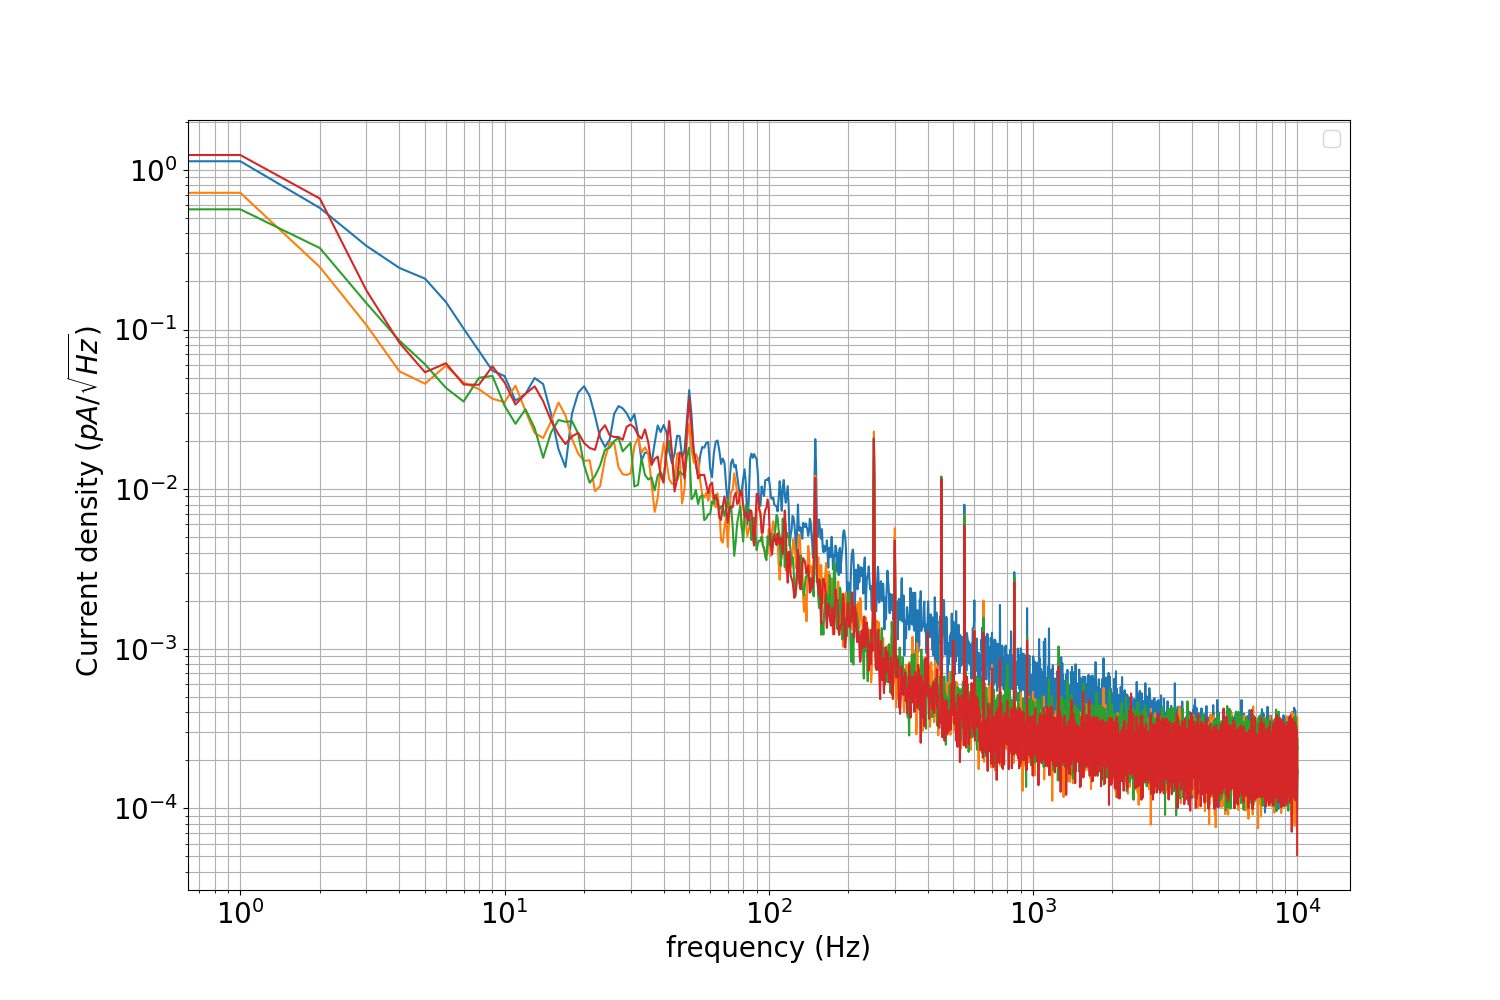

In [33]:
plt.figure(figsize = (15,10))
for i in range(len(OSCILLO_analyse)):
    f,va = PSD_avg(OSCILLO_analyse[i][0], Fs, BW, 20000)
    plt.loglog(f,va*factor)
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")

## CMB S4 Board 3

In [38]:
### TES_LF
CMB_TES1PS_UF = np.genfromtxt(DATA_DIR / 'cmbs4_20122024/CMBT0UPS.TXT') 
CMB_TES1PS_LF = np.genfromtxt(DATA_DIR / 'cmbs4_20122024/CMBT0LPS.TXT') 
CMB_TES1PS_HF = np.genfromtxt(DATA_DIR / 'cmbs4_20122024/CMBT0HPS.TXT')

CMB_TES2PS_UF = np.genfromtxt(DATA_DIR / 'cmbs4_20122024/CMBT1UPS.TXT')
CMB_TES2PS_LF = np.genfromtxt(DATA_DIR / 'cmbs4_20122024/CMBT1LPS.TXT') 
CMB_TES2PS_HF = np.genfromtxt(DATA_DIR / 'cmbs4_20122024/CMBT1HPS.TXT')

CMB_SQI1PS_UF = np.genfromtxt(DATA_DIR / 'cmbs4_20122024/CMBS0UPS.TXT')
CMB_SQI1PS_LF = np.genfromtxt(DATA_DIR / 'cmbs4_20122024/CMBS0LPS.TXT') 
CMB_SQI1PS_HF = np.genfromtxt(DATA_DIR / 'cmbs4_20122024/CMBS0HPS.TXT')

CMB_SQI2PS_UF = np.genfromtxt(DATA_DIR / 'cmbs4_20122024/CMBS1UPS.TXT') 
CMB_SQI2PS_LF = np.genfromtxt(DATA_DIR / 'cmbs4_20122024/CMBS1LPS.TXT') 
CMB_SQI2PS_HF = np.genfromtxt(DATA_DIR / 'cmbs4_20122024/CMBS1HPS.TXT')

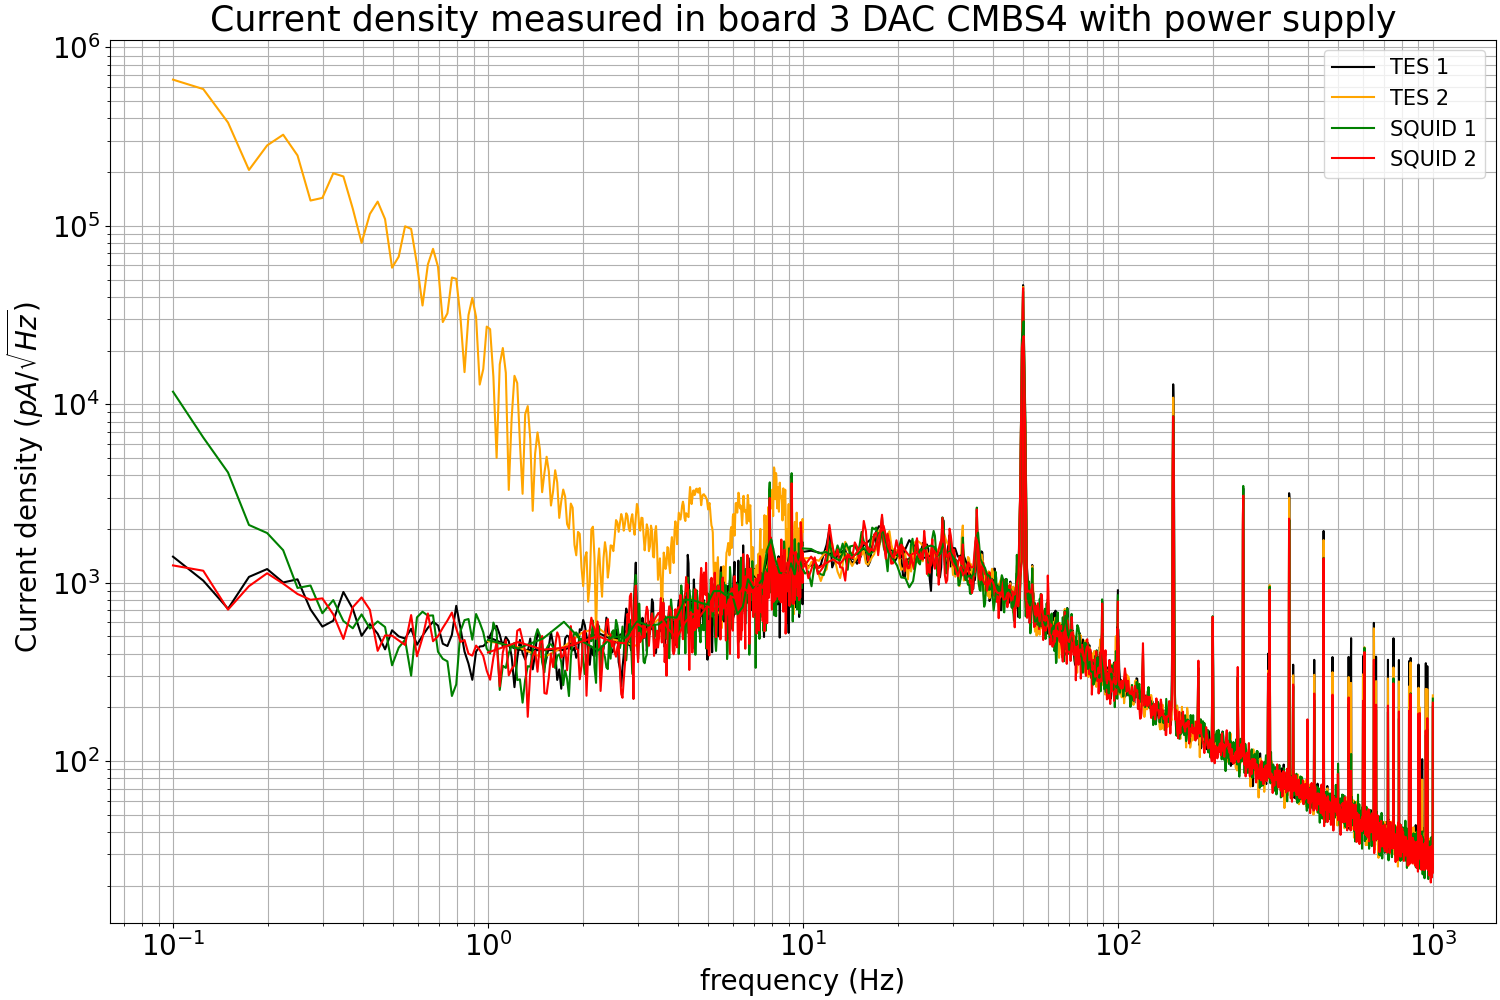

In [39]:
#TES_LF 
plt.figure(figsize = (15,10), constrained_layout=True)
plt.loglog(CMB_TES1PS_UF[:,0], CMB_TES1PS_UF[:,1]*factor, color = color[0] )
plt.loglog(CMB_TES2PS_UF[:,0], CMB_TES2PS_UF[:,1]*factor, color = color[1] )

plt.loglog(CMB_TES1PS_LF[:,0], CMB_TES1PS_LF[:,1]*factor, color = color[0], label = 'TES 1' )
plt.loglog(CMB_TES2PS_LF[:,0], CMB_TES2PS_LF[:,1]*factor, color = color[1], label = 'TES 2' )

plt.loglog(CMB_TES1PS_HF[:,0], CMB_TES1PS_HF[:,1]*factor, color = color[0] )
plt.loglog(CMB_TES2PS_HF[:,0], CMB_TES2PS_HF[:,1]*factor, color = color[1] )

plt.loglog(CMB_SQI1PS_UF[:,0], CMB_SQI1PS_UF[:,1]*factor, color = color[2] )
plt.loglog(CMB_SQI2PS_UF[:,0], CMB_SQI2PS_UF[:,1]*factor, color = color[3] )

plt.loglog(CMB_SQI1PS_LF[:,0], CMB_SQI1PS_LF[:,1]*factor, color = color[2], label = 'SQUID 1' )
plt.loglog(CMB_SQI2PS_LF[:,0], CMB_SQI2PS_LF[:,1]*factor, color = color[3], label = 'SQUID 2' )

plt.loglog(CMB_SQI1PS_HF[:,0], CMB_SQI1PS_HF[:,1]*factor, color = color[2] )
plt.loglog(CMB_SQI2PS_HF[:,0], CMB_SQI2PS_HF[:,1]*factor, color = color[3] )


plt.gca().set_title('Current density measured in board 3 DAC CMBS4 with power supply',fontsize = 25)
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.savefig(FIGS_DIR / 'CMBS4noise_powersupply.png')

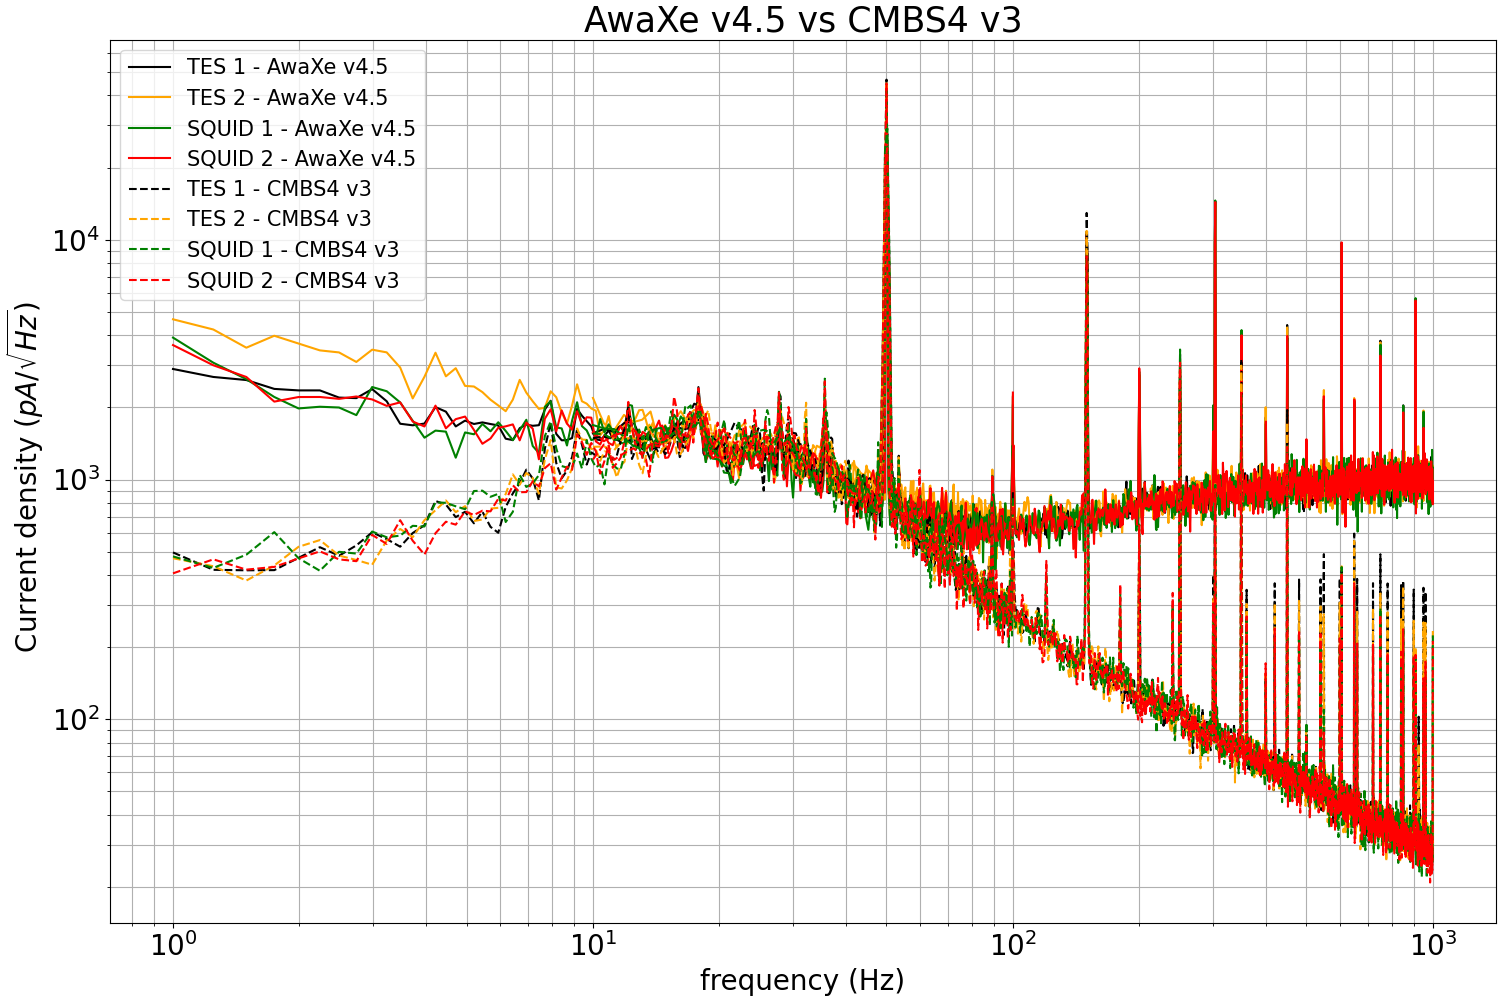

In [40]:
plt.figure(figsize = (15,10), constrained_layout=True)
#TES_LF 
plt.loglog(TES1_LF[:,0], TES1_LF[:,1]*factor, color = color[0], label = 'TES 1 - AwaXe v4.5' )
plt.loglog(TES2_LF[:,0], TES2_LF[:,1]*factor, color = color[1], label = 'TES 2 - AwaXe v4.5' )
#TES_HF 
plt.loglog(TES1_HF[:,0], TES1_HF[:,1]*factor, color = color[0] )
plt.loglog(TES2_HF[:,0], TES2_HF[:,1]*factor, color = color[1] )
#SQUID_LF 
plt.loglog(SQI1_LF[:,0], SQI1_LF[:,1]*factor, color = color[2], label = 'SQUID 1 - AwaXe v4.5' )
plt.loglog(SQI2_LF[:,0], SQI2_LF[:,1]*factor, color = color[3], label = 'SQUID 2 - AwaXe v4.5' )
#SQUID_HF 
plt.loglog(SQI1_HF[:,0], SQI1_HF[:,1]*factor, color = color[2] )
plt.loglog(SQI2_HF[:,0], SQI2_HF[:,1]*factor, color = color[3] )



# plt.loglog(CMB_TES1PS_UF[:,0], CMB_TES1PS_UF[:,1]*factor, color = color[0] )
# plt.loglog(CMB_TES2PS_UF[:,0], CMB_TES2PS_UF[:,1]*factor, color = color[1] )

plt.loglog(CMB_TES1PS_LF[:,0], CMB_TES1PS_LF[:,1]*factor, linestyle = 'dashed', color = color[0], label = 'TES 1 - CMBS4 v3' )
plt.loglog(CMB_TES2PS_LF[:,0], CMB_TES2PS_LF[:,1]*factor, linestyle = 'dashed', color = color[1], label = 'TES 2 - CMBS4 v3' )
plt.loglog(CMB_TES1PS_HF[:,0], CMB_TES1PS_HF[:,1]*factor, linestyle = 'dashed', color = color[0] )
plt.loglog(CMB_TES2PS_HF[:,0], CMB_TES2PS_HF[:,1]*factor, linestyle = 'dashed', color = color[1] )
plt.loglog(CMB_SQI1PS_LF[:,0], CMB_SQI1PS_LF[:,1]*factor, linestyle = 'dashed', color = color[2], label = 'SQUID 1 - CMBS4 v3' )
plt.loglog(CMB_SQI2PS_LF[:,0], CMB_SQI2PS_LF[:,1]*factor, linestyle = 'dashed', color = color[3], label = 'SQUID 2 - CMBS4 v3' )
plt.loglog(CMB_SQI1PS_HF[:,0], CMB_SQI1PS_HF[:,1]*factor, linestyle = 'dashed', color = color[2] )
plt.loglog(CMB_SQI2PS_HF[:,0], CMB_SQI2PS_HF[:,1]*factor, linestyle = 'dashed', color = color[3] )


plt.gca().set_title('AwaXe v4.5 vs CMBS4 v3',fontsize = 25)
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.savefig(FIGS_DIR / 'AWaXev4.5vsCMBS4v3.png')

## Horacio

The data from the oscilloscope where taken with 50 Ohms input impedance and the data taken with the SA where taken with 1MOhm input impedance. So, the data fro the SA must be reduced by a factor 2.

In [157]:
### ### Spectrum analyzer data for v4.5 board laboratory power supply
TES1_LF = np.genfromtxt(DATA_DIR / 'v4.5_PS/345T1LPS.TXT') 
TES1_HF = np.genfromtxt(DATA_DIR / 'v4.5_PS/345T1HPS.TXT') 

TES2_UF = np.genfromtxt(DATA_DIR / 'v4.5_PS/345T2UPS.TXT') 
TES2_LF = np.genfromtxt(DATA_DIR / 'v4.5_PS/345T2LPS.TXT') 
TES2_HF = np.genfromtxt(DATA_DIR / 'v4.5_PS/345T2HPS.TXT')

SQI1_LF = np.genfromtxt(DATA_DIR / 'v4.5_PS/345S1LPS.TXT') 
SQI1_HF = np.genfromtxt(DATA_DIR / 'v4.5_PS/345S1HPS.TXT')

SQI2_UF = np.genfromtxt(DATA_DIR / 'v4.5_PS/345S2UPS.TXT')  
SQI2_LF = np.genfromtxt(DATA_DIR / 'v4.5_PS/345S2LPS.TXT')
SQI2_HF = np.genfromtxt(DATA_DIR / 'v4.5_PS/345S2HPS.TXT')

### Next data is taken connecting the output of the SR Amplifier to both the input of the oscilloscope and the input of the spectrum analyzer at the same time to compare them 
SPECTRO_TES2 = np.genfromtxt(DATA_DIR / 'v4.5_PS/CMPT2HPS.TXT')
SPECTRO_SQI2 = np.genfromtxt(DATA_DIR / 'v4.5_PS/CMPS2HPS.TXT')

#the configuration for the scope is
OSCILLO_TES2 = pd.read_csv(DATA_DIR / 'v4.5_PS/cmpt2hps.Wfm.csv', skiprows=0, header=None, names=['amp']) # No header
OSCILLO_SQI2 = pd.read_csv(DATA_DIR / 'v4.5_PS/cmps2hps.Wfm.csv', skiprows=0, header=None, names=['amp']) # No header

Ts_comp=5e-5           #resolution
Fs_comp=1/Ts_comp      #sample rate
ctime=4                #capture time
memlen=Fs_comp*ctime   #memory lenght/record lenght

delta_f_comp = 1/ctime #delta f
span_comp=(1/2.0)*Fs_comp   #frequency span
print(f'Resolution: {Ts_comp} s, Sampling freq: {Fs_comp} Hz, Memory lenght: {memlen} samples, Capture time: {ctime} s, Deltaf: {delta_f_comp} Hz, Span: {span_comp} Hz, {len(OSCILLO_TES2['amp'])}')

### Spectrum analyzer data for v4.5 board battery powered
TES1BA_UF = np.genfromtxt(DATA_DIR / 'v4.5_20122024/345T1UBA.TXT')
TES1BA_LF = np.genfromtxt(DATA_DIR / 'v4.5_20122024/345T1LBA.TXT')
TES1BA_HF = np.genfromtxt(DATA_DIR / 'v4.5_20122024/345T1HBA.TXT')

TES2BA_UF = np.genfromtxt(DATA_DIR / 'v4.5_20122024/345T2UBA.TXT')
TES2BA_LF = np.genfromtxt(DATA_DIR / 'v4.5_20122024/345T2LBA.TXT') 
TES2BA_HF = np.genfromtxt(DATA_DIR / 'v4.5_20122024/345T2HBA.TXT')

SQI1BA_UF = np.genfromtxt(DATA_DIR / 'v4.5_20122024/345S1UBA.TXT') 
SQI1BA_LF = np.genfromtxt(DATA_DIR / 'v4.5_20122024/345S1LBA.TXT') 
SQI1BA_HF = np.genfromtxt(DATA_DIR / 'v4.5_20122024/345S1HBA.TXT') 

SQI2BA_UF = np.genfromtxt(DATA_DIR / 'v4.5_20122024/345S2UBA.TXT') 
SQI2BA_LF = np.genfromtxt(DATA_DIR / 'v4.5_20122024/345S2LBA.TXT')
SQI2BA_HF = np.genfromtxt(DATA_DIR / 'v4.5_20122024/345S2HBA.TXT')

### Spectrum analyzer data for CMB board
CMB_TES1PS_UF = np.genfromtxt(DATA_DIR / 'cmbs4_20122024/CMBT0UPS.TXT') 
CMB_TES1PS_LF = np.genfromtxt(DATA_DIR / 'cmbs4_20122024/CMBT0LPS.TXT') 
CMB_TES1PS_HF = np.genfromtxt(DATA_DIR / 'cmbs4_20122024/CMBT0HPS.TXT')

CMB_TES2PS_UF = np.genfromtxt(DATA_DIR / 'cmbs4_20122024/CMBT1UPS.TXT')
CMB_TES2PS_LF = np.genfromtxt(DATA_DIR / 'cmbs4_20122024/CMBT1LPS.TXT') 
CMB_TES2PS_HF = np.genfromtxt(DATA_DIR / 'cmbs4_20122024/CMBT1HPS.TXT')

CMB_SQI1PS_UF = np.genfromtxt(DATA_DIR / 'cmbs4_20122024/CMBS0UPS.TXT')
CMB_SQI1PS_LF = np.genfromtxt(DATA_DIR / 'cmbs4_20122024/CMBS0LPS.TXT') 
CMB_SQI1PS_HF = np.genfromtxt(DATA_DIR / 'cmbs4_20122024/CMBS0HPS.TXT')

CMB_SQI2PS_UF = np.genfromtxt(DATA_DIR / 'cmbs4_20122024/CMBS1UPS.TXT') 
CMB_SQI2PS_LF = np.genfromtxt(DATA_DIR / 'cmbs4_20122024/CMBS1LPS.TXT') 
CMB_SQI2PS_HF = np.genfromtxt(DATA_DIR / 'cmbs4_20122024/CMBS1HPS.TXT')


### Oscilloscope data
tes1 = pd.read_csv(DATA_DIR / 'v4.5_20122024/345t1ba.Wfm.csv', skiprows=0, header=None, names=['amp'])
tes2 = pd.read_csv(DATA_DIR / 'v4.5_20122024/345t2ba.Wfm.csv', skiprows=0, header=None, names=['amp'])
sq1 = pd.read_csv(DATA_DIR / 'v4.5_20122024/345s1ba.Wfm.csv', skiprows=0, header=None, names=['amp'])
sq2 = pd.read_csv(DATA_DIR / 'v4.5_20122024/345s2ba.Wfm.csv', skiprows=0, header=None, names=['amp'])

Resolution: 5e-05 s, Sampling freq: 20000.0 Hz, Memory lenght: 80000.0 samples, Capture time: 4 s, Deltaf: 0.25 Hz, Span: 10000.0 Hz, 80000


First thing to do is to check if the data taken from the comparison are good

In [158]:
gain=510*1000
factor=1e12/gain
print(factor)

1960784.3137254901


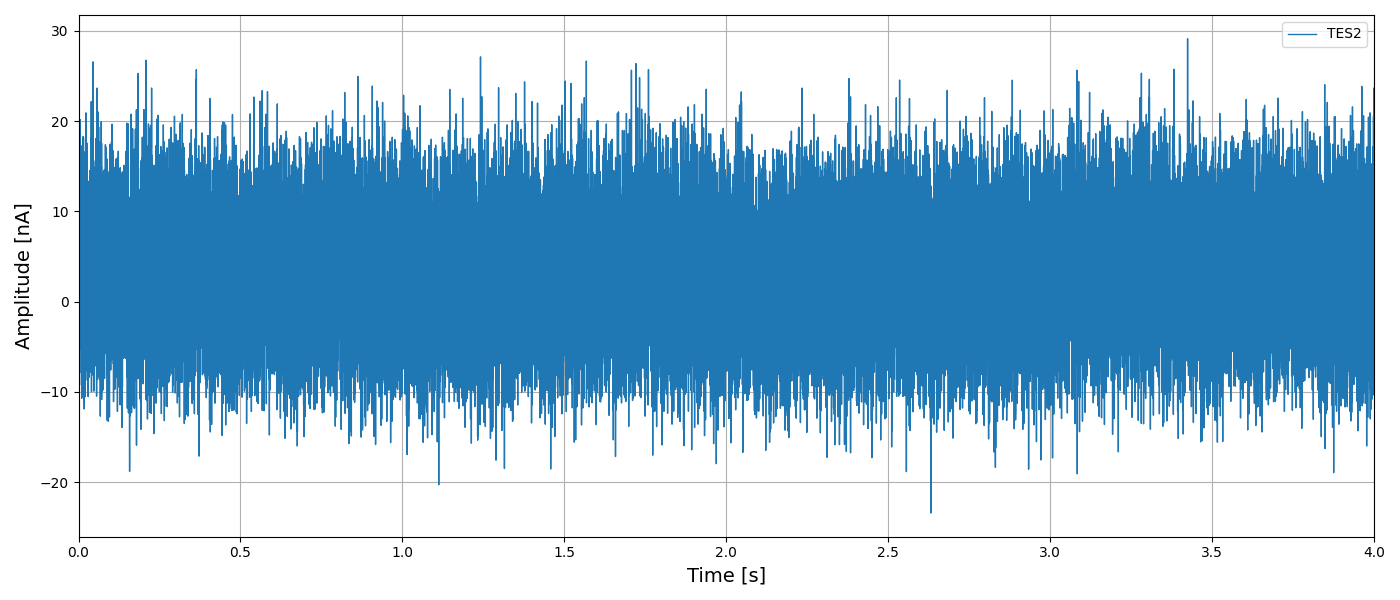

In [159]:
fig, ax1 = plt.subplots(1,1,figsize=(14,6))
#plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
ax1.plot(np.arange(len(OSCILLO_TES2['amp']))*Ts_comp,OSCILLO_TES2['amp']*(factor/1e3), lw=1.0,label='TES2')
ax1.legend()
ax1.set_xlabel('Time [s]',fontsize=14)
ax1.set_ylabel('Amplitude [nA]',fontsize=14)
ax1.grid()
ax1.set_xlim(0,len(OSCILLO_TES2['amp'])*Ts_comp)
plt.tight_layout()
plt.savefig(FIGS_DIR / 'tdomain_comp.png')

In [164]:
nfft = int(memlen)
win  = sg.windows.boxcar(nfft)

#The factor 2 is for the impedance mismatch and the factor sqrt(20) is for the Navg=20 applied to the SA data while we took the data
[f,ixx]= sg.welch(OSCILLO_TES2['amp']*factor*(2*np.sqrt(20)),fs=Fs_comp,window=win,nfft=nfft,scaling='spectrum',detrend=False) 
I_Hz = np.sqrt(ixx/delta_f_comp) # I/sqrt{Hz}

/tmp/ipykernel_198403/3010665833.py:7: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,span_comp)


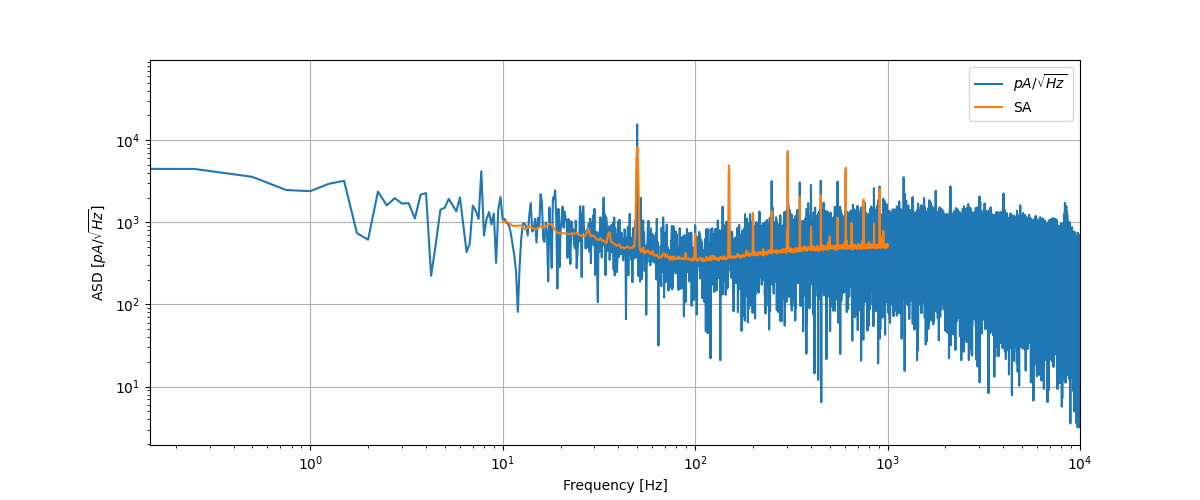

In [165]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
#plt.ticklabel_format(style='sci',axis='both',scilimits=(0,0))
ax.loglog(f,I_Hz, label=r'$pA/ \sqrt{Hz}$')
#ax.loglog(f,I_Hz*10, color='r',label=r'$pA/ \sqrt{Hz}$')
plt.loglog(SPECTRO_TES2[:,0], SPECTRO_TES2[:,1]*factor, label = 'SA' )
ax.grid()
ax.set_xlim(0,span_comp)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel(r'ASD [$pA/ \sqrt{Hz}$]')
plt.legend()

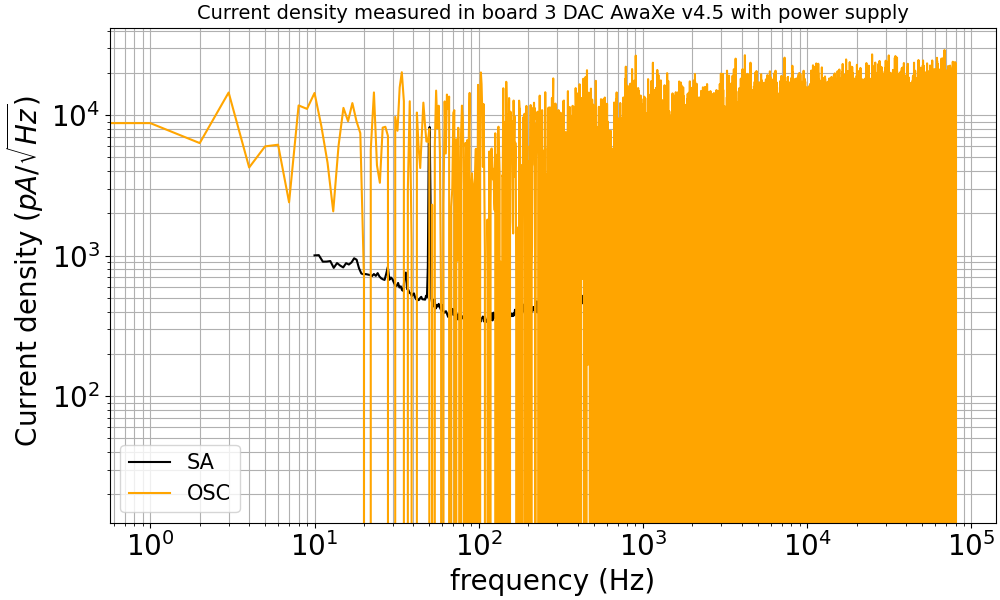

In [125]:
plt.figure(figsize = (10,6), constrained_layout=True)
# plt.subplot(211)

plt.loglog(SPECTRO_TES2[:,0], SPECTRO_TES2[:,1]*factor, color = color[0], label = 'SA' )
plt.loglog(np.arange(len(OSCILLO_TES2['amp'])), OSCILLO_TES2['amp']*factor, color = color[1], label = 'OSC' )
#TES_HF 
#plt.loglog(TES1_HF[:,0], TES1_HF[:,1]*factor, color = color[0] )
#plt.loglog(TES2_HF[:,0], TES2_HF[:,1]*factor, color = color[1] )
#SQUID_LF 
#plt.loglog(SQI1_LF[:,0], SQI1_LF[:,1]*factor, color = color[2], label = 'SQUID 1' )
#plt.loglog(SQI2_LF[:,0], SQI2_LF[:,1]*factor, color = color[3], label = 'SQUID 2' )
#SQUID_HF 
#plt.loglog(SQI1_HF[:,0], SQI1_HF[:,1]*factor, color = color[2] )
#plt.loglog(SQI2_HF[:,0], SQI2_HF[:,1]*factor, color = color[3] )


plt.gca().set_title('Current density measured in board 3 DAC AwaXe v4.5 with power supply',fontsize = 14)
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.savefig(FIGS_DIR / 'board3_v4.5_comp_TES12_SQUID12.png')

## Samples in time-domain

In [179]:
#Setup for the oscilloscope

Fs=20e3           #sampling frequency 
Ts=1/Fs           #resolution
N=400e3          #memory lenght/record lenght
ctime=Ts*N       #capture time
delta_f = 1/ctime #delta f
t=np.arange(N)*Ts
span=(1/2.0)*Fs   #frequency span
gain=(1000*510)   #(Gain SR560 = 1000 ;  load = 510Ω)
print(f'{N}, {delta_f} Hz, {Ts} s, {span} Hz, {ctime} s, DataLen: {len(tes1['amp'])}')

400000.0, 0.05 Hz, 5e-05 s, 10000.0 Hz, 20.0 s, DataLen: 400000


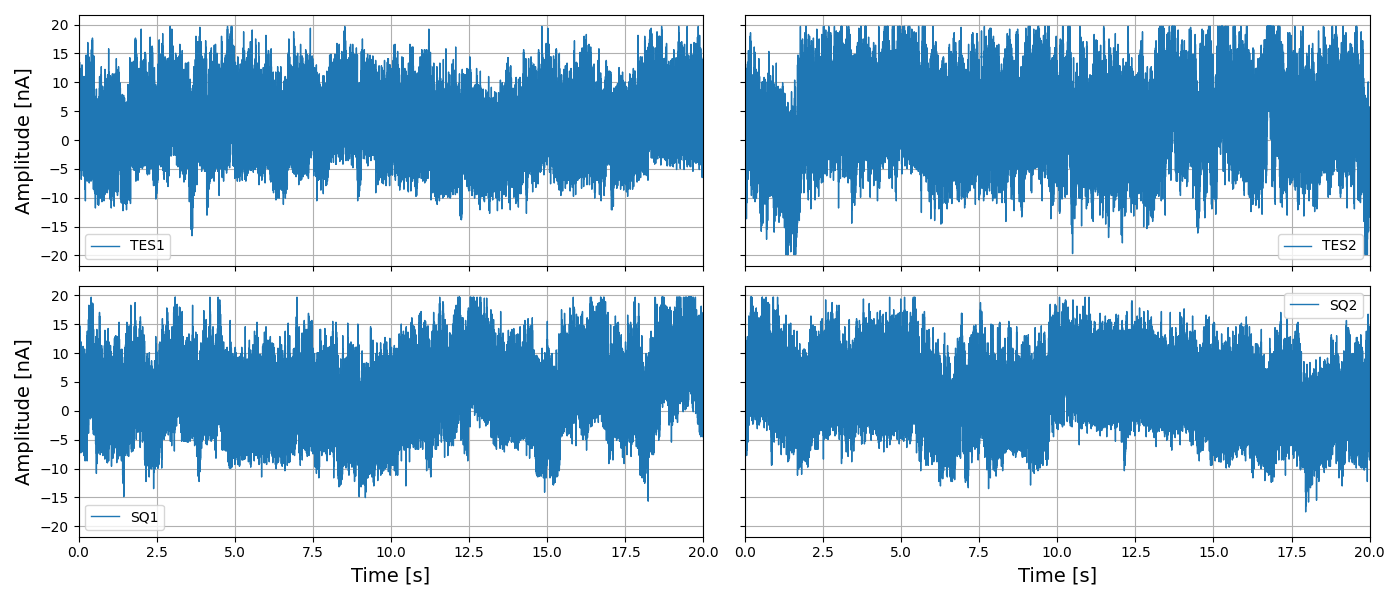

In [108]:
fig, [ax1,ax2] = plt.subplots(2,2,figsize=(14,6),sharex=True,sharey=True)
#plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
ax1[0].plot(t,(tes1['amp']/gain)*1e9, lw=1.0,label='TES1')
ax1[1].plot(t,(tes2['amp']/gain)*1e9, lw=1.0,label='TES2')
ax2[0].plot(t,(sq1['amp']/gain)*1e9, lw=1.0,label='SQ1')
ax2[1].plot(t,(sq2['amp']/gain)*1e9, lw=1.0,label='SQ2')
ax1[0].legend()
ax1[1].legend()
ax2[0].legend()
ax2[1].legend()
ax2[0].set_xlabel('Time [s]',fontsize=14)
ax2[1].set_xlabel('Time [s]',fontsize=14)
ax1[0].set_ylabel('Amplitude [nA]',fontsize=14)
ax2[0].set_ylabel('Amplitude [nA]',fontsize=14)
ax1[0].grid()
ax1[1].grid()
ax2[0].grid()
ax2[1].grid()
ax2[0].set_xlim(0,N*Ts)
ax2[1].set_xlim(0,N*Ts)
plt.tight_layout()
plt.savefig(FIGS_DIR / 'tdomain_tes2.png')

In [91]:
nfft = N
win  = sg.windows.boxcar(nfft)
print(len(win),len(tes2))
[f,pxx]= sg.welch(tes2['amp']/gain,fs=Fs,window=win,nfft=nfft,detrend=False) # W/Hz power spectral density
IdB_Hz = 10*np.log10(np.sqrt(pxx)) # dBI/sqrt{Hz}
IdB_bin= 10*np.log10(np.sqrt(pxx*Fs/nfft)) # dBI/sqrt{bin}

400000 400000


-77.99870203419144


/tmp/ipykernel_137819/204816942.py:5: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,span)


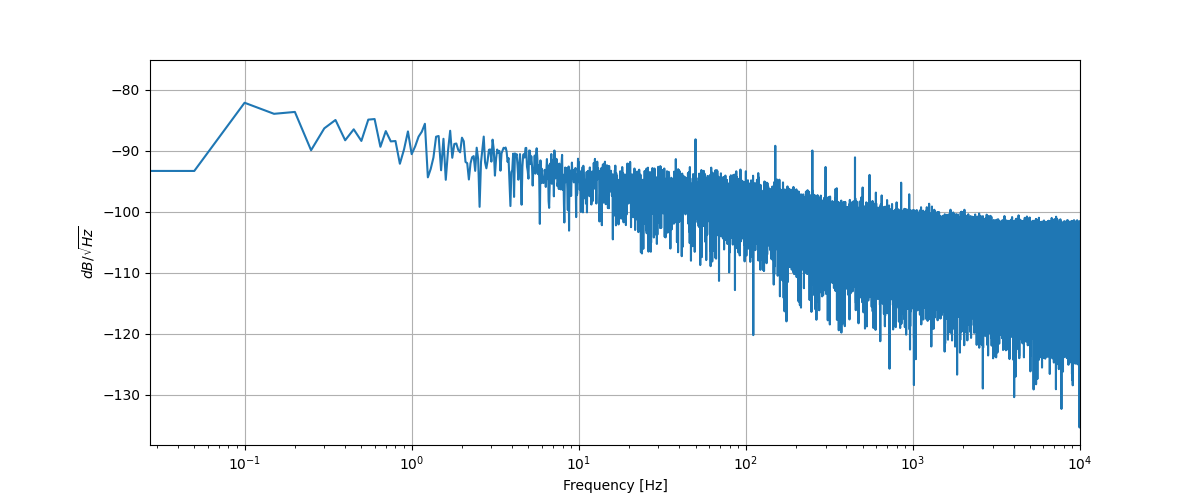

In [92]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
#plt.ticklabel_format(style='sci',axis='both',scilimits=(0,0))
ax.semilogx(f,IdB_Hz);
ax.grid()
ax.set_xlim(0,span)
ax.set_xlabel('Frequency [Hz]');
ax.set_ylabel(r'$dB/\sqrt{Hz}$');
print(max(IdB_Hz))

/tmp/ipykernel_137819/3691836565.py:6: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,span)


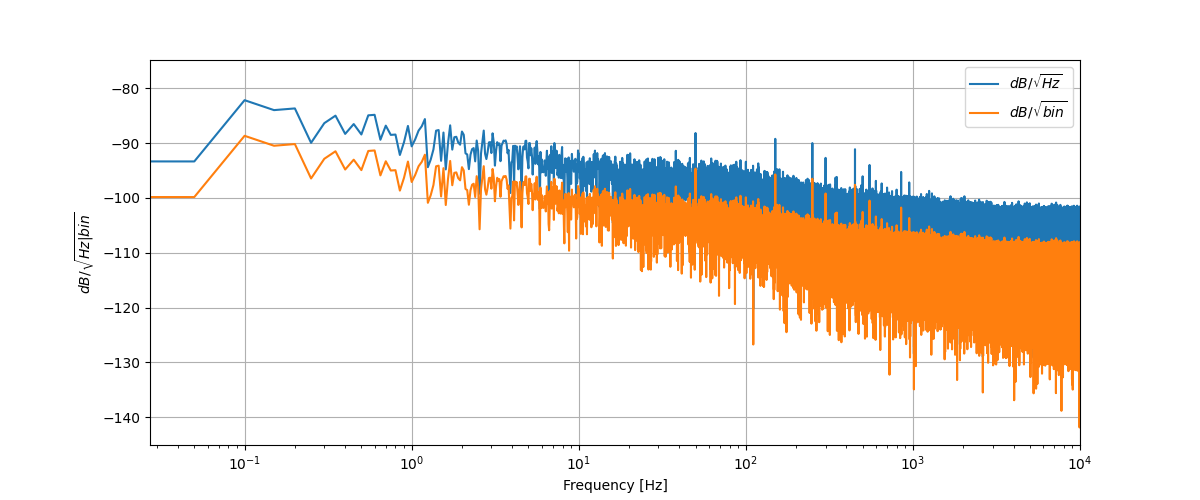

In [93]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
#plt.ticklabel_format(style='sci',axis='both',scilimits=(0,0))
ax.semilogx(f,IdB_Hz, label=r'$dB/\sqrt{Hz}$')
ax.semilogx(f,IdB_bin, label=r'$dB/\sqrt{bin}$')
ax.grid()
ax.set_xlim(0,span)
ax.set_xlabel('Frequency [Hz]');
ax.set_ylabel(r'$dB/\sqrt{Hz|bin}$');
plt.legend()

In [94]:
PW_Hz = np.sqrt(pxx) # I/sqrt{Hz}
PW_bin= np.sqrt(pxx*Fs/nfft) # I/sqrt{bin}

/tmp/ipykernel_137819/2598634915.py:6: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,span)


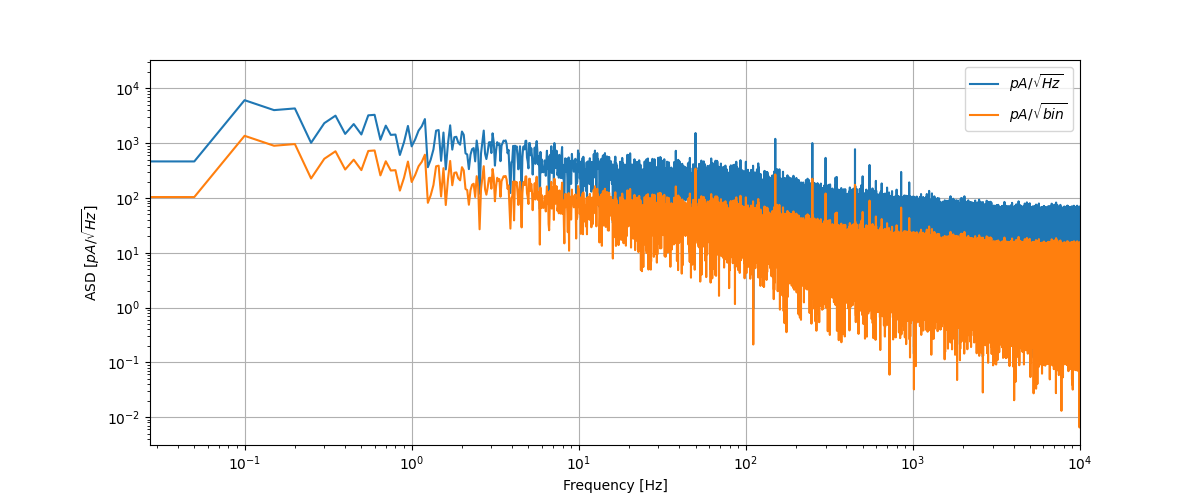

In [95]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
#plt.ticklabel_format(style='sci',axis='both',scilimits=(0,0))
ax.loglog(f,PW_Hz*1e12, label=r'$pA/ \sqrt{Hz}$')
ax.loglog(f,PW_bin*1e12, label=r'$pA/ \sqrt{bin}$')
ax.grid()
ax.set_xlim(0,span)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel(r'ASD [$pA/ \sqrt{Hz}$]')
plt.legend()

Now let's check with the amplitude spectrum

In [109]:
nfft = N
win  = sg.windows.boxcar(nfft)
print(len(win),len(tes2))
[f,ixx]= sg.welch(tes2['amp']/gain,fs=Fs,window=win,nfft=nfft,scaling='spectrum',detrend=False) # W/Hz power spectral density
IdB_Hz = 10*np.log10(np.sqrt(ixx/delta_f)) # dBI/sqrt{Hz}
IdB_bin= 10*np.log10(np.sqrt((ixx/delta_f)*Fs/nfft)) # dBI/sqrt{bin}

400000 400000


/tmp/ipykernel_137819/3691836565.py:6: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,span)


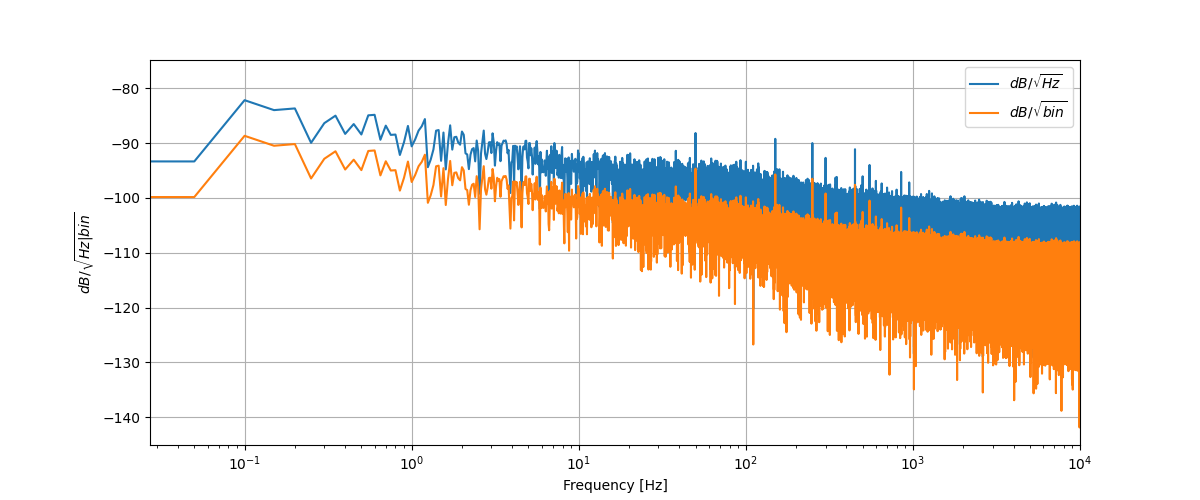

In [110]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
#plt.ticklabel_format(style='sci',axis='both',scilimits=(0,0))
ax.semilogx(f,IdB_Hz, label=r'$dB/\sqrt{Hz}$')
ax.semilogx(f,IdB_bin, label=r'$dB/\sqrt{bin}$')
ax.grid()
ax.set_xlim(0,span)
ax.set_xlabel('Frequency [Hz]');
ax.set_ylabel(r'$dB/\sqrt{Hz|bin}$');
plt.legend()

In [111]:
PW_Hz = np.sqrt(ixx/delta_f) # I/sqrt{Hz}
PW_bin= np.sqrt((ixx/delta_f)*Fs/nfft) # I/sqrt{bin}

/tmp/ipykernel_137819/3424267037.py:7: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,span)


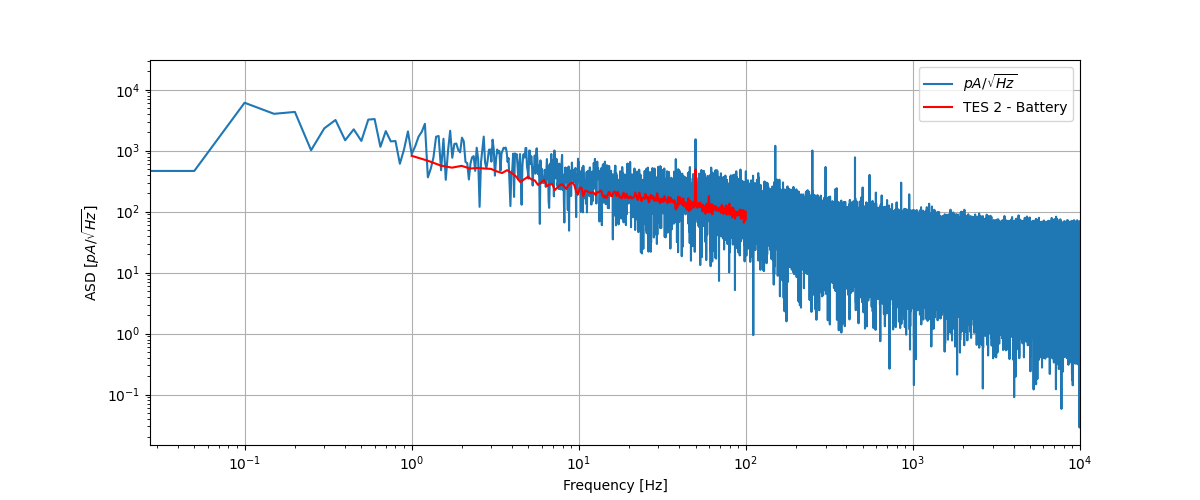

In [113]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
#plt.ticklabel_format(style='sci',axis='both',scilimits=(0,0))
ax.loglog(f,PW_Hz*1e12, label=r'$pA/ \sqrt{Hz}$')
#ax.loglog(f,PW_bin*1e12, label=r'$pA/ \sqrt{bin}$')
plt.loglog(TES2BA_LF[:,0], TES2BA_LF[:,1]*gain, color = 'r', label = 'TES 2 - Battery' )
ax.grid()
ax.set_xlim(0,span)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel(r'ASD [$pA/ \sqrt{Hz}$]')
plt.legend()

## Reference data
In the following we will plot some datafiles we took in order to have all the parameters well defined in our setup:

<figure>
<img src="./images/meas_setup_2.jpeg" style="width:40%">
<figcaption align = "center"> Figure 1. Measurement setup for the board number 3 of the AwaXe v4.5. We measured the TES1 in this setup. </figcaption>
</figure>

We have two sets of measurements:

1. Comparison measurements done connecting a T between the spectrum analizer and the oscilloscope
2. Independent measurements done first with the spectrum analizer and then with the oscilloscope 

In [17]:
#Oscilloscope configuration
Ts_comp=5e-5           #resolution
Fs_comp=1/Ts_comp      #sample rate
memlen=int(400e3)      #memory lenght/record lenght
ctime=memlen*Ts_comp   #capture time
delta_f_comp = 1/ctime #delta f
span_comp=(1/2.0)*Fs_comp   #frequency span
t=np.arange(memlen)*Ts_comp
print(f'Resolution: {Ts_comp} s, Sampling freq: {Fs_comp} Hz, Memory lenght: {memlen} samples, Capture time: {ctime} s, Deltaf: {delta_f_comp} Hz, Span: {span_comp} Hz')

Resolution: 5e-05 s, Sampling freq: 20000.0 Hz, Memory lenght: 400000 samples, Capture time: 20.0 s, Deltaf: 0.05 Hz, Span: 10000.0 Hz


In [95]:
gain=((510*1000))       #This gain takes into account the input impedances of the scope and the sa which is 1M
factor=1e12/gain
print(factor)

1960784.3137254901


### Comparison measurements

In [135]:
sa_tes1_uf = np.genfromtxt(DATA_DIR / 'compare_OS_SA/CMPT1UF.TXT')
sa_tes1_lf = np.genfromtxt(DATA_DIR / 'compare_OS_SA/CMPT1LF.TXT')
sa_tes1_hf = np.genfromtxt(DATA_DIR / 'compare_OS_SA/CMPT1HF.TXT')

### Oscilloscope data
os_tes1_av01 = pd.read_csv(DATA_DIR / 'compare_OS_SA/cmpt1a01.Wfm.csv', skiprows=0, header=None, names=['amp']) #without averaging
#the next datasamples are not really averaged
#os_tes1_av10 = pd.read_csv(DATA_DIR / 'compare_OS_SA/cmpt1a10.Wfm.csv', skiprows=0, header=None, names=['amp']) #with 10 times averaging

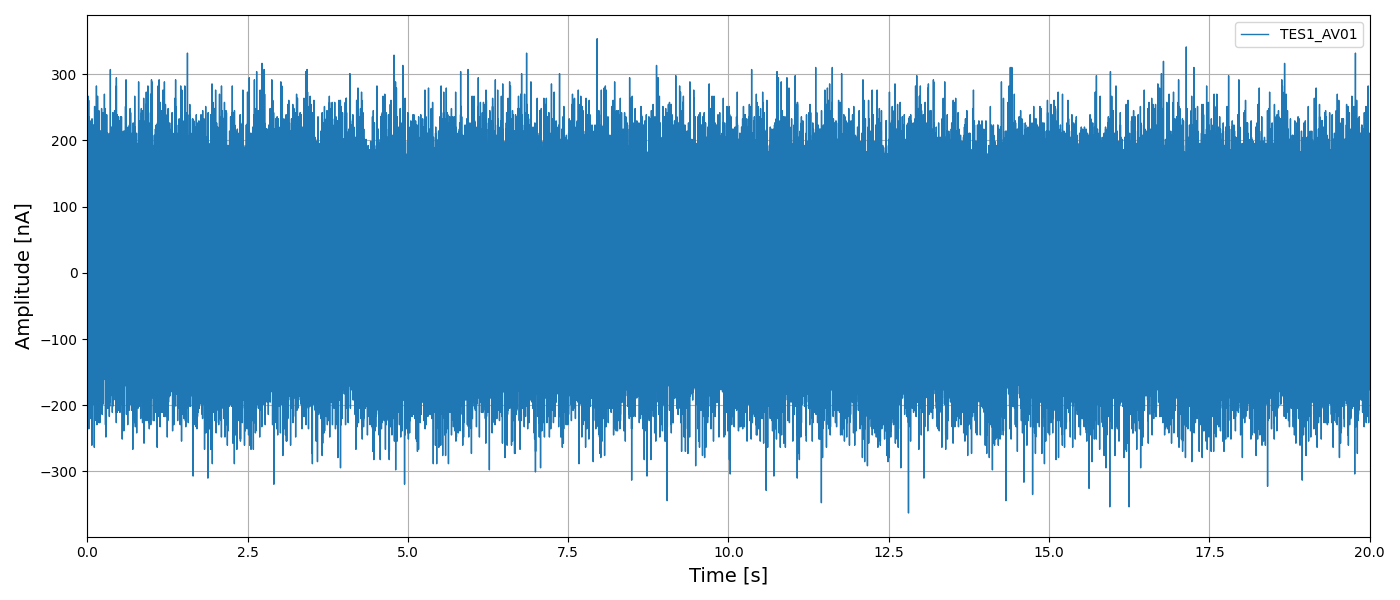

In [136]:
fig, ax1 = plt.subplots(1,1,figsize=(14,6))
#plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
ax1.plot(t,os_tes1_av01['amp']*(factor/1e3), lw=1.0,label='TES1_AV01')
#ax1.plot(t,os_tes1_av10['amp']*(factor/1e3), lw=1.0,label='TES1_AV10')
ax1.legend()
ax1.set_xlabel('Time [s]',fontsize=14)
ax1.set_ylabel('Amplitude [nA]',fontsize=14)
ax1.grid()
ax1.set_xlim(0,ctime)
plt.tight_layout()
plt.savefig(FIGS_DIR / 'tdomain_comp_ref.png')

In [137]:
nfft = memlen
win  = sg.windows.boxcar(nfft)
print(len(win),len(os_tes1_av01))
[f,ixx]= sg.welch(os_tes1_av01['amp'],fs=Fs_comp,window=win,nfft=nfft,detrend=False,scaling='spectrum') 
IW_Hz = np.sqrt(ixx/delta_f_comp) # I/sqrt{Hz}

400000 400000


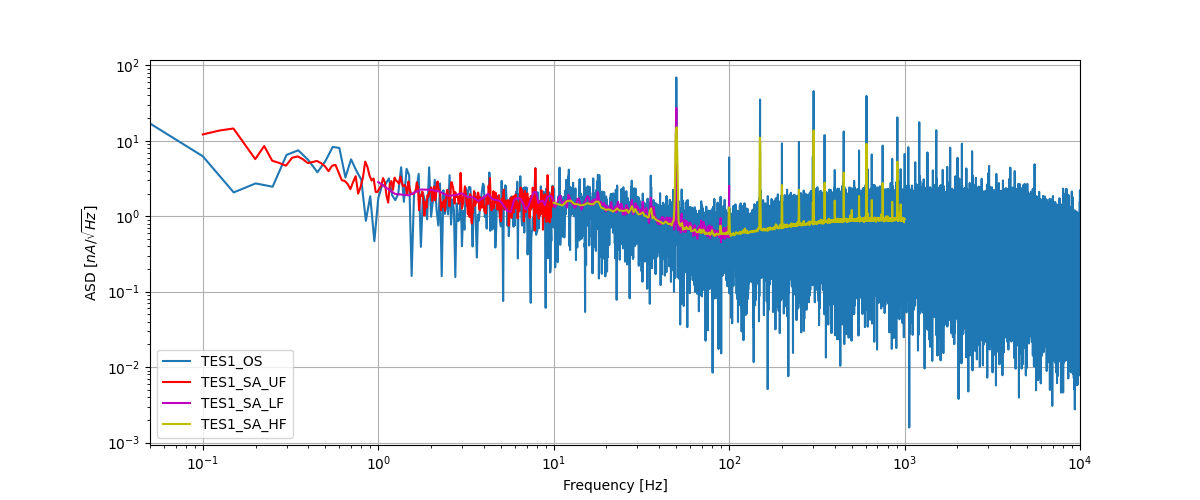

In [138]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
#plt.ticklabel_format(style='sci',axis='both',scilimits=(0,0))
ax.loglog(f,IW_Hz*(factor/1e3), label='TES1_OS')
#ax.loglog(f,PW_bin*1e12, label=r'$pA/ \sqrt{bin}$')
plt.loglog(sa_tes1_uf[:,0], sa_tes1_uf[:,1]*(factor/1e3), color = 'r', label = 'TES1_SA_UF' )
plt.loglog(sa_tes1_lf[:,0], sa_tes1_lf[:,1]*(factor/1e3), color = 'm', label = 'TES1_SA_LF' )
plt.loglog(sa_tes1_hf[:,0], sa_tes1_hf[:,1]*(factor/1e3), color = 'y', label = 'TES1_SA_HF' )
ax.grid()
ax.set_xlim(1/ctime,span_comp)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel(r'ASD [$nA/ \sqrt{Hz}$]')
plt.legend()
plt.savefig(FIGS_DIR / 'fdomain_comp_ref.png')

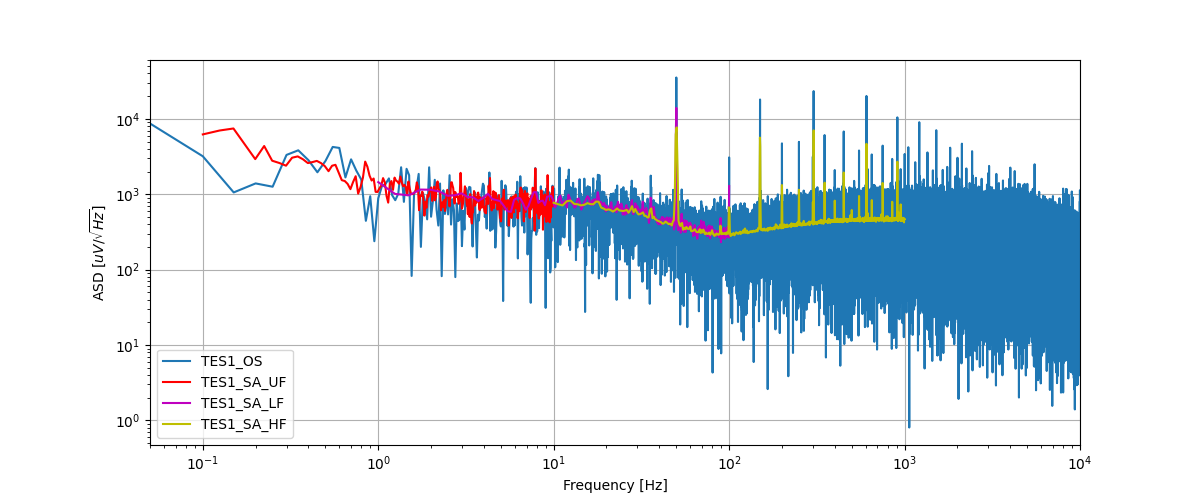

In [100]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
#plt.ticklabel_format(style='sci',axis='both',scilimits=(0,0))
ax.loglog(f,IW_Hz*1e6, label='TES1_OS')
#ax.loglog(f,PW_bin*1e12, label=r'$pA/ \sqrt{bin}$')
plt.loglog(sa_tes1_uf[:,0], sa_tes1_uf[:,1]*1e6, color = 'r', label = 'TES1_SA_UF' )
plt.loglog(sa_tes1_lf[:,0], sa_tes1_lf[:,1]*1e6, color = 'm', label = 'TES1_SA_LF' )
plt.loglog(sa_tes1_hf[:,0], sa_tes1_hf[:,1]*1e6, color = 'y', label = 'TES1_SA_HF' )
ax.grid()
ax.set_xlim(1/ctime,span_comp)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel(r'ASD [$uV/ \sqrt{Hz}$]')
plt.legend()
plt.savefig(FIGS_DIR / 'fdomain_comp_ref_nofactor.png')

### Independent measurements

In [140]:
sa_345tes1_uf = np.genfromtxt(DATA_DIR / 'compare_OS_SA/345T1UF.TXT')
sa_345tes1_lf = np.genfromtxt(DATA_DIR / 'compare_OS_SA/345T1LF.TXT')
sa_345tes1_hf = np.genfromtxt(DATA_DIR / 'compare_OS_SA/345T1HF.TXT')

### Oscilloscope data
os_345tes1_av001 = pd.read_csv(DATA_DIR / 'compare_OS_SA/345t1a01.Wfm.csv', skiprows=0, header=None, names=['amp']) #without averaging
os_345tes1_av010 = pd.read_csv(DATA_DIR / 'compare_OS_SA/345t1a10i1M.Wfm.csv', skiprows=0, header=None, names=['amp']) #with 10 times averaging
#The next data is not really averaged
#os_345tes1_av010 = pd.read_csv(DATA_DIR / 'compare_OS_SA/345t1a10.Wfm.csv', skiprows=0, header=None, names=['amp']) #with 10 times averaging
#os_345tes1_av100 = pd.read_csv(DATA_DIR / 'compare_OS_SA/345t1a100.Wfm.csv', skiprows=0, header=None, names=['amp']) #with 100 times averaging

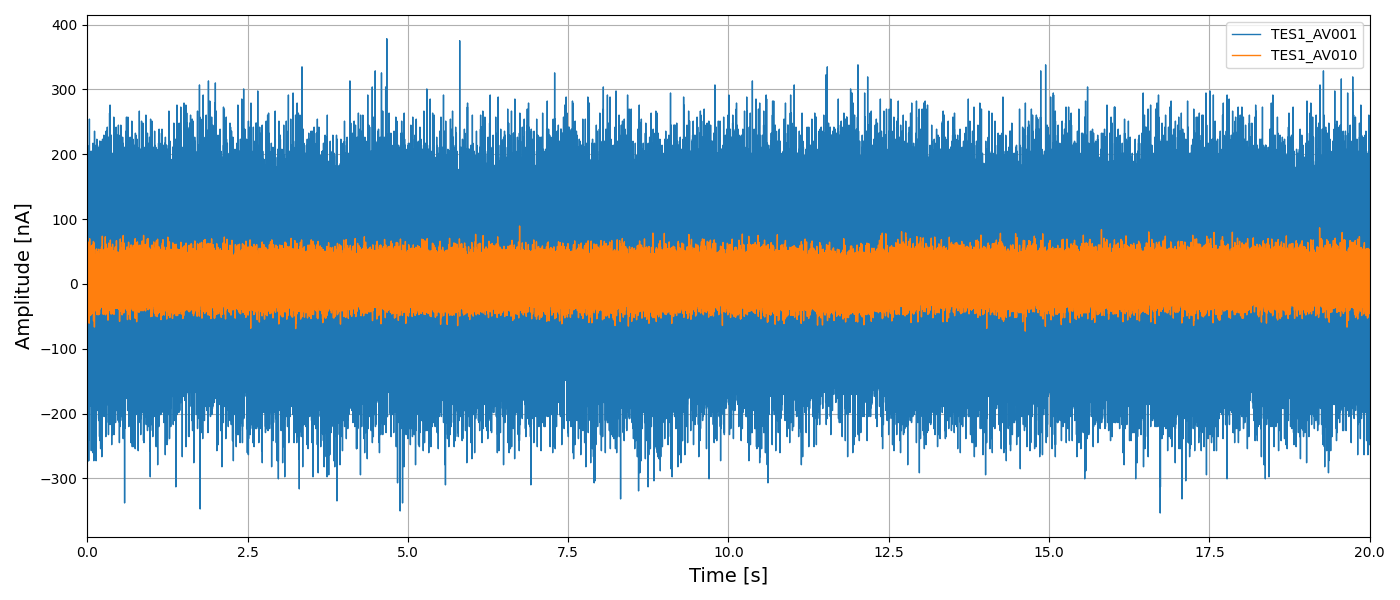

In [142]:
#First plot time data with different averaging factors
fig, ax1 = plt.subplots(1,1,figsize=(14,6))
#plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
ax1.plot(t,os_345tes1_av001['amp']*(factor/1e3), lw=1.0,label='TES1_AV001')
ax1.plot(t,os_345tes1_av010['amp']*(factor/1e3), lw=1.0,label='TES1_AV010')
#ax1.plot(t,os_345tes1_av100['amp']*(factor/1e3), lw=1.0,label='TES1_AV100')
ax1.legend()
ax1.set_xlabel('Time [s]',fontsize=14)
ax1.set_ylabel('Amplitude [nA]',fontsize=14)
ax1.grid()
ax1.set_xlim(0,ctime)
plt.tight_layout()
plt.savefig(FIGS_DIR / 'tdomain_board3_v45.png')

In [145]:
nfft = memlen
win  = sg.windows.boxcar(nfft)
print(len(win),len(os_tes1_av01))
[f_001,pxx_001]= sg.welch(os_345tes1_av001['amp'],fs=Fs_comp,window=win,nfft=nfft,detrend=False,scaling='spectrum') 
[f_010,pxx_010]= sg.welch(os_345tes1_av010['amp'],fs=Fs_comp,window=win,nfft=nfft,detrend=False,scaling='spectrum') 
#[f_100,pxx_100]= sg.welch(os_345tes1_av100['amp'],fs=Fs_comp,window=win,nfft=nfft,detrend=False,scaling='spectrum') 

PdB_bin001 = 10*np.log10(pxx_001)
PdB_bin010 = 10*np.log10(pxx_010)
#PdB_bin100 = 10*np.log10(pxx_100)
#Recovering the PSD of noise
[f11,pxx11]= sg.welch(os_345tes1_av001['amp'],fs=Fs_comp,window=win,nfft=nfft,detrend=False,scaling='density') 
print(f'PSD of noise for av001: {np.mean(pxx11[int(pxx11.size/2):]):.2e}')
#Recovering the PSD of noise
[f22,pxx22]= sg.welch(os_345tes1_av010['amp'],fs=Fs_comp,window=win,nfft=nfft,detrend=False,scaling='density')
print(f'PSD of noise for av010: {np.mean(pxx22[int(pxx22.size/2):]):.2e}')
#Recovering the PSD of noise
#[f33,pxx33]= sg.welch(os_345tes1_av100['amp'],fs=Fs_comp,window=win,nfft=nfft,detrend=False,scaling='density')
#print(f'PSD of noise for N[1]: {np.mean(pxx33[int(pxx33.size/2):]):.2e}')


print(f'Mean value for Tsim={ctime:.1e}: {np.mean(PdB_bin001[50:]):.1f} dB')
print(f'Mean value for Tsim={ctime:.1e}: {np.mean(PdB_bin010[50:]):.1f} dB')
print(f'Difference: {np.mean(PdB_bin001[50:])-np.mean(PdB_bin010[50:]):.1f} dB')

400000 400000
PSD of noise for av001: 8.31e-08
PSD of noise for av010: 4.45e-09
Mean value for Tsim=2.0e+01: -84.7 dB
Mean value for Tsim=2.0e+01: -97.4 dB
Difference: 12.7 dB


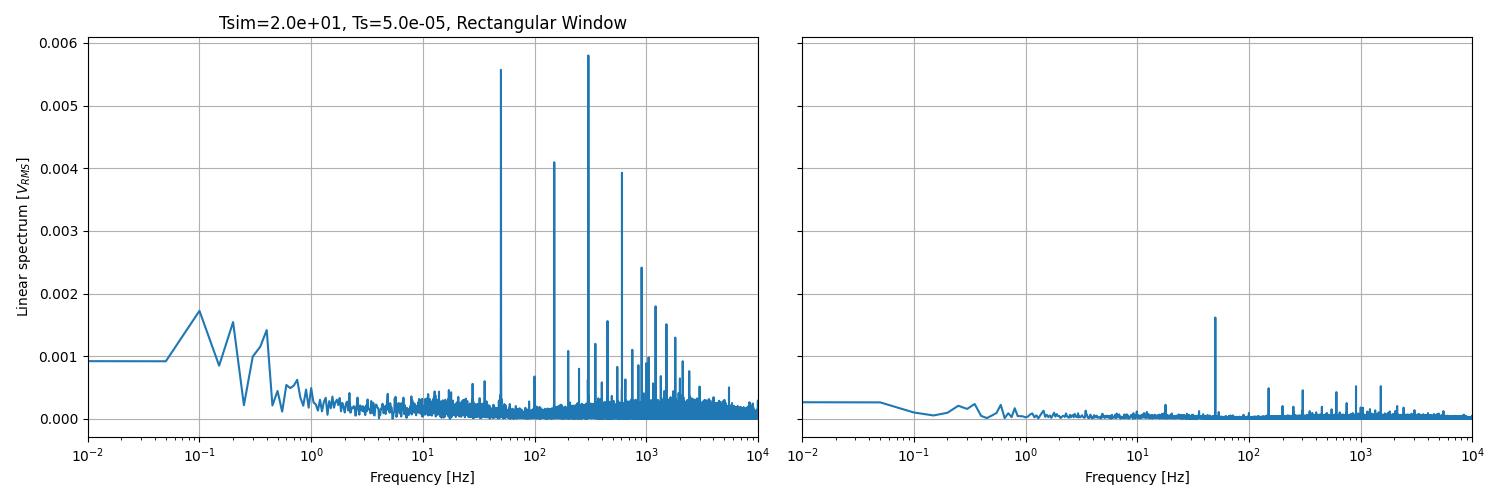

In [146]:
fig,ax = plt.subplots(1,2,figsize=(15,5),sharey=True)

#ax[0].semilogy(f_001, np.sqrt(pxx_001))
ax[0].semilogx(f_001, np.sqrt(pxx_001))
#ax[0].axhline(np.mean(PdB_Hz1[50:]), ls="dashed", color="r")
ax[0].grid()
ax[0].set_title(f'Tsim={ctime:.1e}, Ts={Ts_comp:.1e}, Rectangular Window')
ax[0].set_xlabel('Frequency [Hz]')
ax[0].set_ylabel(r'Linear spectrum [$V_{RMS}$]')
ax[0].set_xlim(0.01,Fs_comp/2)

#ax[1].semilogy(f_010, np.sqrt(pxx_010))
ax[1].semilogx(f_010, np.sqrt(pxx_010))
#ax[1].axhline(np.mean(PdB_Hz2[50:]), ls="dashed", color="r")
ax[1].grid()
#ax[1].set_title(f'Tsim={ctime:.1e}, Ts={Ts_comp:.1e}, Rectangular Window')
ax[1].set_xlabel('Frequency [Hz]')
#ax[1].set_ylabel(r'PSD (dB re 1 Vrms)')
ax[1].set_xlim(0.01,Fs_comp/2)

#ax[2].semilogy(f_100, np.sqrt(pxx_100))
#ax[2].semilogx(f_100, np.sqrt(pxx_100))
#ax[2].axhline(np.mean(PdB_Hz2[50:]), ls="dashed", color="r")
#ax[2].grid()
#ax[2].set_title(f'Tsim={ctime:.1e}, Ts={Ts_comp:.1e}, Rectangular Window')
#ax[2].set_xlabel('Frequency [Hz]')
#ax[2].set_ylabel(r'PSD (dB re 1 Vrms)')
#ax[2].set_xlim(0.01,Fs_comp/2)

plt.tight_layout()
plt.savefig('plots/linear_spectrum_3xavg.pdf')

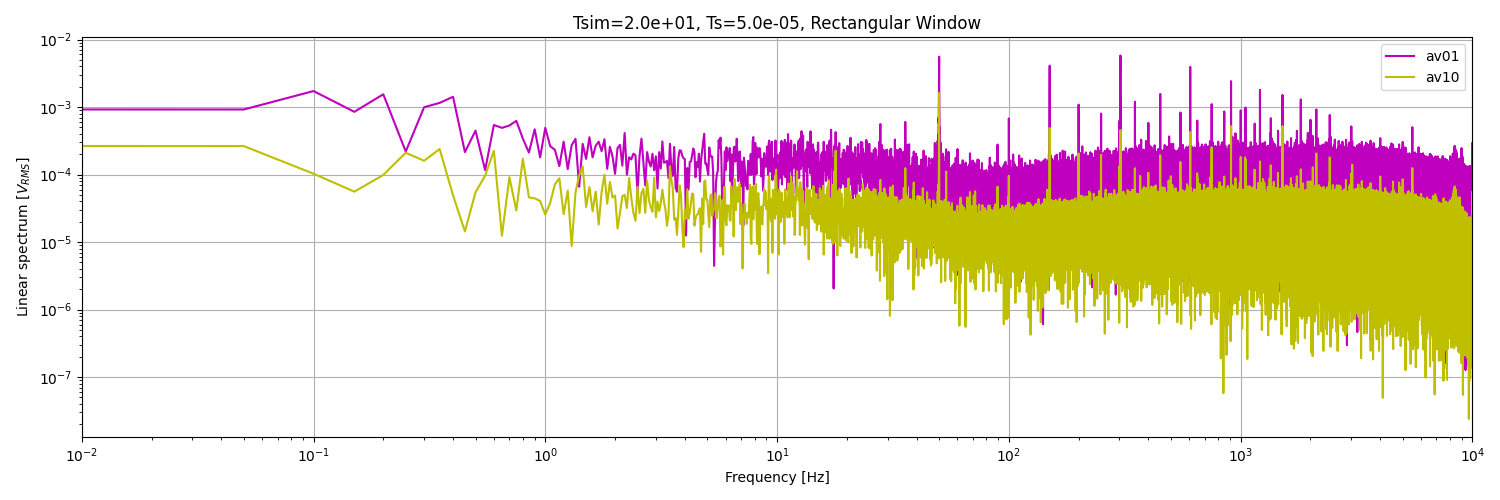

In [153]:
fig,ax = plt.subplots(1,1,figsize=(15,5),sharey=True)

#ax[0].semilogy(f_001, np.sqrt(pxx_001))
#ax.loglog(f_100, np.sqrt(pxx_100))
ax.loglog(f_001, np.sqrt(pxx_001),'m',label='av01')
ax.loglog(f_010, np.sqrt(pxx_010),'y',label='av10')
ax.legend()
ax.grid()
ax.set_title(f'Tsim={ctime:.1e}, Ts={Ts_comp:.1e}, Rectangular Window')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel(r'Linear spectrum [$V_{RMS}$]')
ax.set_xlim(0.01,Fs_comp/2)
plt.tight_layout()
plt.savefig('plots/linear_spectrum_3xavg_alltogether.pdf')

400000 400000


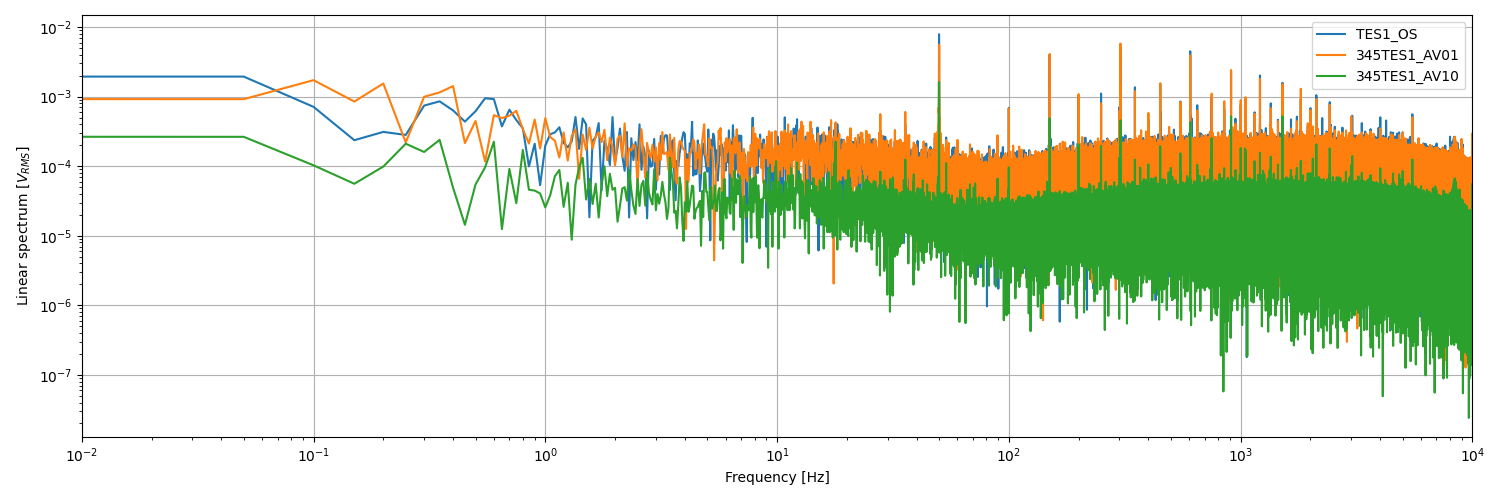

In [155]:
nfft = memlen
win  = sg.windows.boxcar(nfft)
print(len(win),len(os_tes1_av01))
[f,ixx]= sg.welch(os_tes1_av01['amp'],fs=Fs_comp,window=win,nfft=nfft,detrend=False,scaling='spectrum') 
[f_001,pxx_001]= sg.welch(os_345tes1_av001['amp'],fs=Fs_comp,window=win,nfft=nfft,detrend=False,scaling='spectrum') 
[f_010,pxx_010]= sg.welch(os_345tes1_av010['amp'],fs=Fs_comp,window=win,nfft=nfft,detrend=False,scaling='spectrum') 
#[f_100,pxx_100]= sg.welch(os_345tes1_av100['amp'],fs=Fs_comp,window=win,nfft=nfft,detrend=False,scaling='spectrum') 

fig,ax = plt.subplots(1,1,figsize=(15,5))

#ax[0].semilogy(f_001, np.sqrt(pxx_001))
ax.loglog(f,np.sqrt(ixx), label='TES1_OS')
ax.loglog(f_001, np.sqrt(pxx_001), label='345TES1_AV01')
ax.loglog(f_010, np.sqrt(pxx_010), label='345TES1_AV10')
#ax.loglog(f_010, np.sqrt(pxx_010))
#ax.loglog(f_100, np.sqrt(pxx_100))

ax.grid()
ax.legend()
#ax.set_title(f'Tsim={ctime:.1e}, Ts={Ts_comp:.1e}, Rectangular Window')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel(r'Linear spectrum [$V_{RMS}$]')
ax.set_xlim(0.01,Fs_comp/2)
plt.tight_layout()
plt.savefig('plots/linear_spectrum_alltogether.pdf')

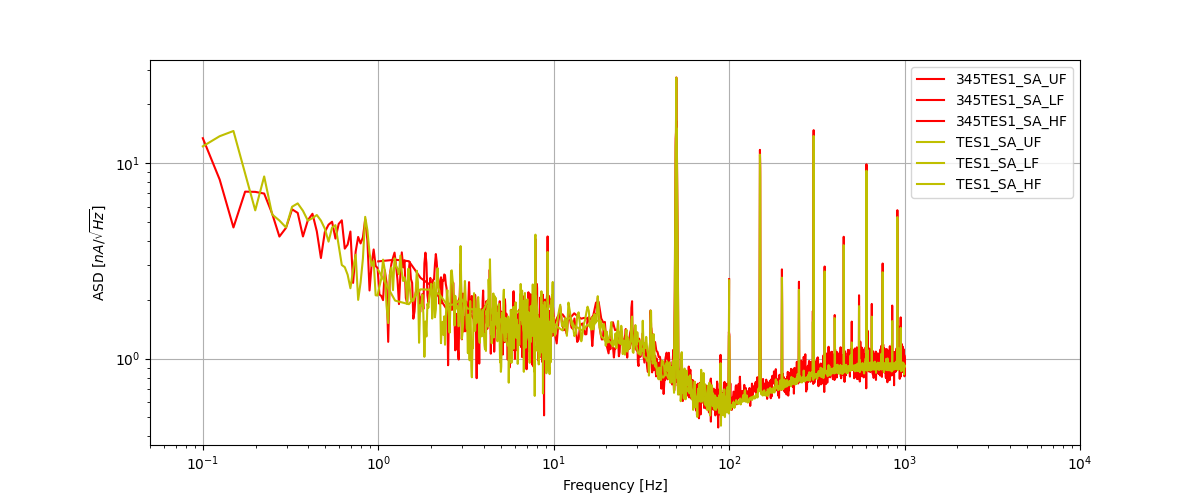

In [101]:
#Comparison between the splitted data and the independent one
fig,ax=plt.subplots(1,1,figsize=(12,5))
#plt.ticklabel_format(style='sci',axis='both',scilimits=(0,0))
plt.loglog(sa_345tes1_uf[:,0], sa_345tes1_uf[:,1]*(factor/1e3), color = 'r', label = '345TES1_SA_UF' )
plt.loglog(sa_345tes1_lf[:,0], sa_345tes1_lf[:,1]*(factor/1e3), color = 'r', label = '345TES1_SA_LF' )
plt.loglog(sa_345tes1_hf[:,0], sa_345tes1_hf[:,1]*(factor/1e3), color = 'r', label = '345TES1_SA_HF' )

#ax.loglog(f,PW_bin*1e12, label=r'$pA/ \sqrt{bin}$')
plt.loglog(sa_tes1_uf[:,0], sa_tes1_uf[:,1]*(factor/1e3), color = 'y', label = 'TES1_SA_UF' )
plt.loglog(sa_tes1_lf[:,0], sa_tes1_lf[:,1]*(factor/1e3), color = 'y', label = 'TES1_SA_LF' )
plt.loglog(sa_tes1_hf[:,0], sa_tes1_hf[:,1]*(factor/1e3), color = 'y', label = 'TES1_SA_HF' )
ax.grid()
ax.set_xlim(1/ctime,span_comp)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel(r'ASD [$nA/ \sqrt{Hz}$]')
plt.legend()
plt.savefig(FIGS_DIR / 'fdomain_comp_sa.png')